# Diabetes, Hypertension and Stroke Prediction

### Contribution

- Kunjan Vaghela (kv353)
- Hrishikesh Salunkhe (hs1121)
- Jash Jayant Shah (js3297)
- Dhruv Snehal Satyapanthi (ds1990)

## Importing data and initial checks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Importing data
diabetes_data = pd.read_csv("diabetes_data.csv")
hypertension_data = pd.read_csv("hypertension_data.csv")
stroke_data = pd.read_csv("stroke_data.csv")

In [3]:
print(diabetes_data.dtypes)
print(hypertension_data.dtypes)
print(stroke_data.dtypes)

# print(diabetes_data.info())
# print(hypertension_data.info())
# print(stroke_data.info())

Age                     float64
Sex                     float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Stroke                  float64
HighBP                  float64
Diabetes                float64
dtype: object
age         float64
sex         float64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object
sex                  float64
age                  float64
hypertension           int64
heart_disease          int64


## Common Functions used

In [4]:
## To check if there are duplicate values present in the dataset
def check_duplicates(df, title):
  # check for duplicates
  duplicates = df.duplicated()

  # Count the total number of rows
  total_rows = df.shape[0]

  # Count the number of duplicate rows
  num_duplicates = sum(duplicates)

  # Remove duplicate rows
  df_no_duplicates = df.drop_duplicates()

  print("----- Duplicate check for ", title, "-----")
  print("Total number of rows:", total_rows)
  print("Number of duplicate rows:", num_duplicates)
  print("Number of unique rows after removing duplicates:", df_no_duplicates.shape[0])


## To get unique values in the dataset
def find_unique_values(df, title):
  unique_vals=[]
  for col in df.columns:
      unival=df[col].nunique()
      unique_vals.append(unival)
  print(pd.DataFrame(unique_vals,columns=['Unique_Values'],index=df.columns))


# To generate pair plot for the dataset's given column with others
def generate_pairplot(df, column_name):
  for col in df.columns:
    if col == column_name: continue
    sns.pairplot(df[[column_name, col]])
    plt.show()

# Finding outliers in the given dataframe for the given column
def find_outliers(df, column_name):
  # Using IQR
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1
  outliers = df[(df[column_name] < (Q1 - 1.5 * IQR)) | (df[column_name] > (Q3 + 1.5 * IQR))]
  print("Outliers for the column (using IQR range) ", column_name, " : ")
  print(outliers[column_name].unique())

  # Using z_scores
  z_scores = stats.zscore(df[column_name])
  outliers = df[(z_scores < -3) | (z_scores > 3)]
  print("Outliers for the column (using Z-score) ", column_name, " : ")
  print(outliers[column_name].unique())

# EDA on Diabetes Dataset

### Does the diabetes data contain any duplicates?

In [5]:
# Duplicates present
check_duplicates(diabetes_data, "Diabetes Dataset")
# Removing duplicates
diabetes_data = diabetes_data.drop_duplicates()

----- Duplicate check for  Diabetes Dataset -----
Total number of rows: 70692
Number of duplicate rows: 6672
Number of unique rows after removing duplicates: 64020


In [6]:
# Duplicates present
check_duplicates(hypertension_data, "Hypertension Dataset")
# Removing duplicates
hypertension_data = hypertension_data.drop_duplicates()

----- Duplicate check for  Hypertension Dataset -----
Total number of rows: 26083
Number of duplicate rows: 0
Number of unique rows after removing duplicates: 26083


In [7]:
# Duplicates present
check_duplicates(stroke_data, "Stroke Dataset")
# Removing duplicates
stroke_data = stroke_data.drop_duplicates()

----- Duplicate check for  Stroke Dataset -----
Total number of rows: 40910
Number of duplicate rows: 0
Number of unique rows after removing duplicates: 40910


### Does the dataset have any null attributes for any record?

In [8]:
# Checking for any Null values in the dataset
print(diabetes_data.isnull().sum())

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64


### How many unique values are present for each attribute?

In [9]:
# Checking for all the unique values:
find_unique_values(diabetes_data, "Diabetes Dataset")

                      Unique_Values
Age                              13
Sex                               2
HighChol                          2
CholCheck                         2
BMI                              80
Smoker                            2
HeartDiseaseorAttack              2
PhysActivity                      2
Fruits                            2
Veggies                           2
HvyAlcoholConsump                 2
GenHlth                           5
MentHlth                         31
PhysHlth                         31
DiffWalk                          2
Stroke                            2
HighBP                            2
Diabetes                          2


### Does multivariate attributes contain any outliers?

In [10]:
# Checking for outliers for the columns Age, BMI, GenHlth, MentHlth, PhysHlth
cols = ["Age", "BMI", "GenHlth", "MentHlth", "PhysHlth"]
print("Outliers check for the Diabetes dataset")
for col in cols:
  print("Unique values of ", col, " :")
  print(diabetes_data[col].unique())
  find_outliers(diabetes_data, col)


Outliers check for the Diabetes dataset
Unique values of  Age  :
[ 4. 12. 13. 11.  8.  1.  6.  3.  7. 10.  9.  5.  2.]
Outliers for the column (using IQR range)  Age  : 
[]
Outliers for the column (using Z-score)  Age  : 
[]
Unique values of  BMI  :
[26. 28. 29. 18. 31. 32. 27. 24. 21. 58. 30. 20. 22. 38. 40. 25. 36. 47.
 19. 37. 41. 23. 34. 35. 42. 17. 33. 44. 15. 52. 69. 56. 45. 39. 92. 53.
 98. 50. 46. 79. 48. 16. 63. 72. 54. 49. 68. 43. 84. 73. 76. 55. 51. 75.
 57. 60. 12. 77. 82. 67. 71. 61. 14. 81. 59. 86. 13. 87. 65. 95. 89. 62.
 64. 66. 85. 70. 83. 80. 78. 74.]
Outliers for the column (using IQR range)  BMI  : 
[58. 52. 69. 56. 92. 53. 98. 50. 79. 48. 63. 72. 54. 49. 68. 84. 73. 76.
 55. 51. 75. 57. 60. 77. 82. 67. 71. 61. 81. 59. 86. 87. 65. 95. 89. 62.
 64. 66. 85. 70. 83. 80. 78. 74.]
Outliers for the column (using Z-score)  BMI  : 
[58. 69. 56. 92. 53. 98. 79. 63. 72. 54. 68. 84. 73. 76. 55. 75. 57. 60.
 77. 82. 67. 71. 61. 81. 59. 86. 87. 65. 95. 89. 62. 64. 66. 85. 70. 83

### Is our dataset biased towards any diabetic result?

Text(0.5, 1.0, 'Diabetes')

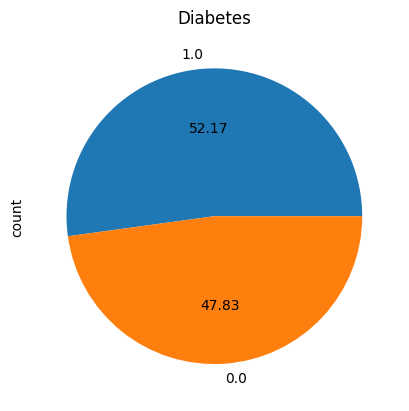

In [11]:
diabetes_data['Diabetes'].value_counts().plot(kind="pie", autopct="%.2f")
plt.title("Diabetes")

### Understanding the variability/spread of the data

Column :  Age


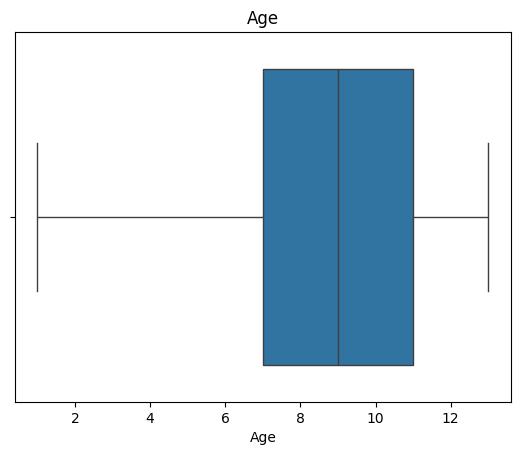

Column :  Sex


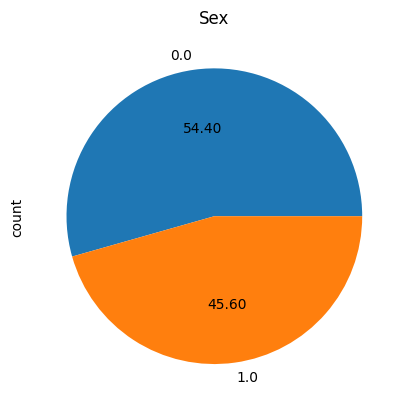

Column :  HighChol


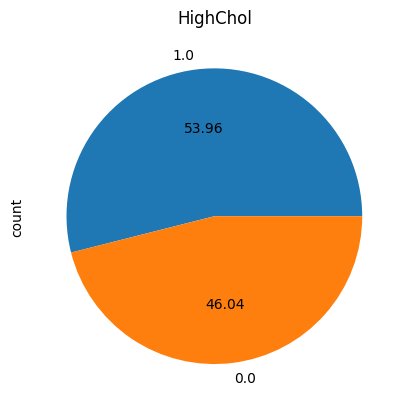

Column :  CholCheck


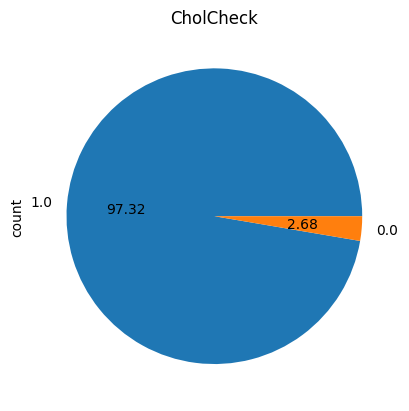

Column :  BMI


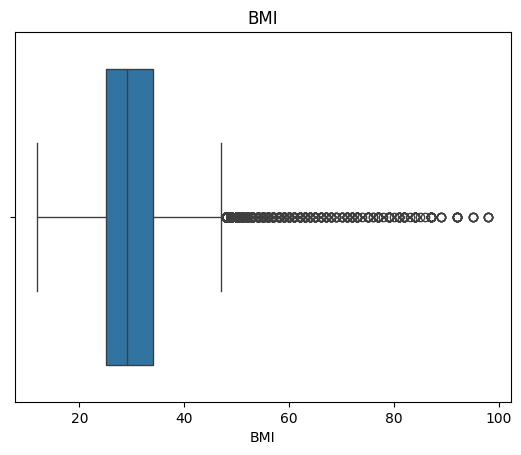

Column :  Smoker


Column :  HeartDiseaseorAttack


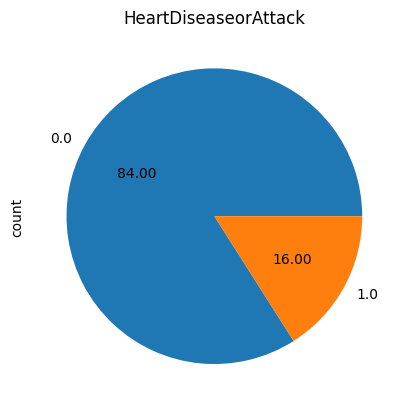

Column :  PhysActivity


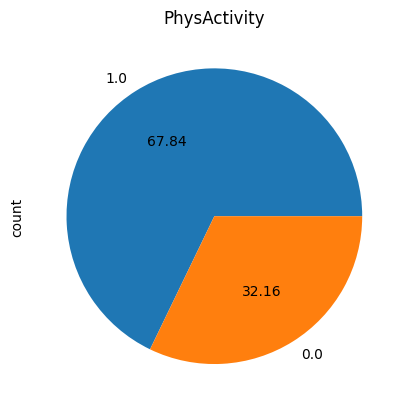

Column :  Fruits


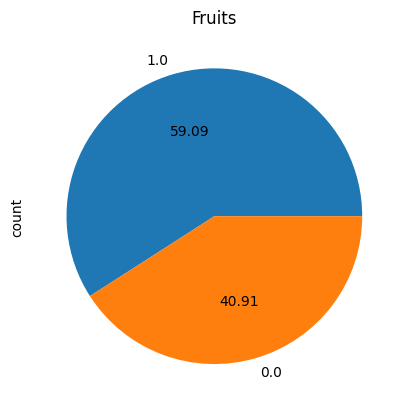

Column :  Veggies


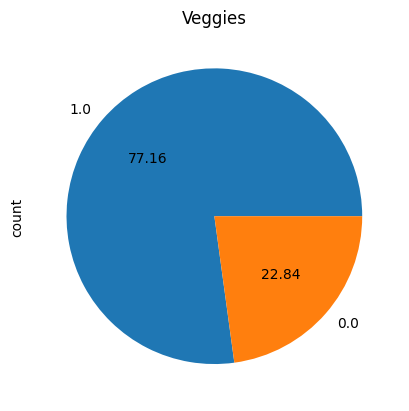

Column :  HvyAlcoholConsump


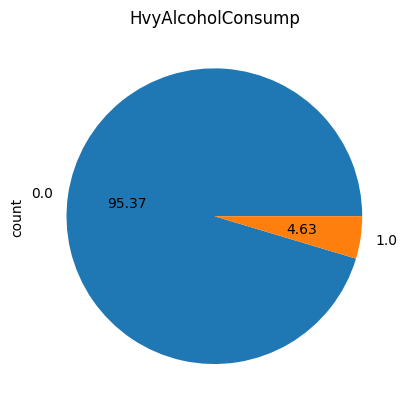

Column :  GenHlth


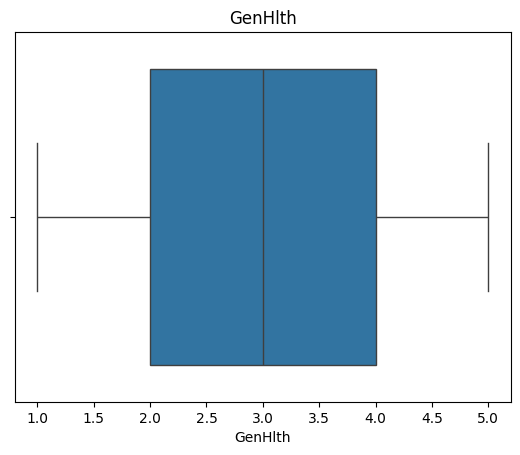

Column :  MentHlth


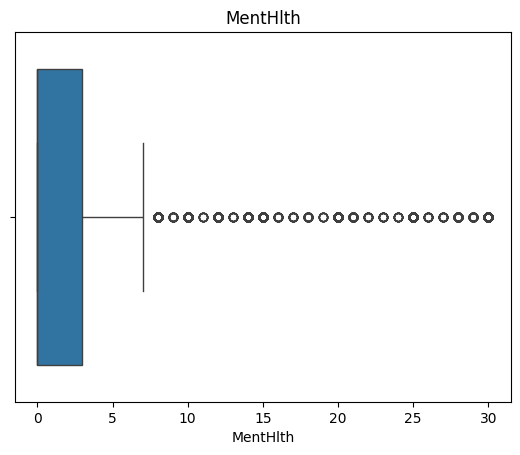

Column :  PhysHlth


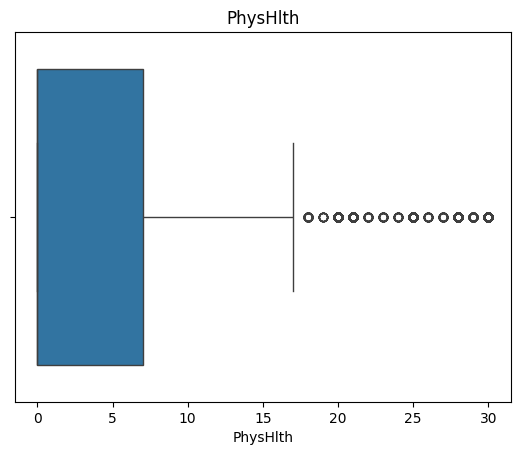

Column :  DiffWalk


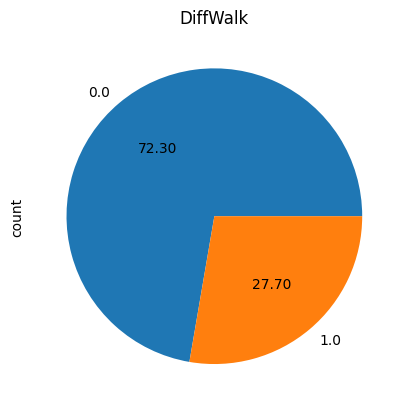

Column :  Stroke


Column :  HighBP


Column :  Diabetes


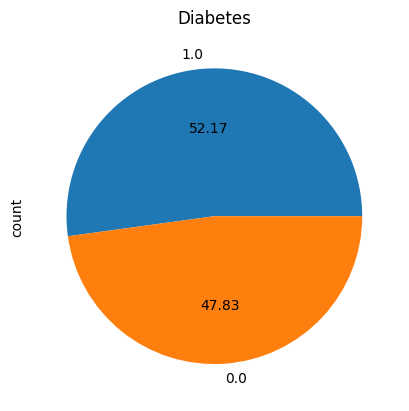

In [12]:
# Display boxplots
for col in diabetes_data.columns:
  print("Column : ", col)
  # sns.boxplot(x=diabetes_data[col])
  # plt.show()
  if diabetes_data[col].nunique() == 2:
    # print(diabetes_data[col].value_counts())
    diabetes_data[col].value_counts().plot(kind="pie", autopct="%.2f")
  else:
    sns.boxplot(x=diabetes_data[col])
  plt.title(col)
  plt.show()

### How does the attributes correlate with each other?

<Axes: >

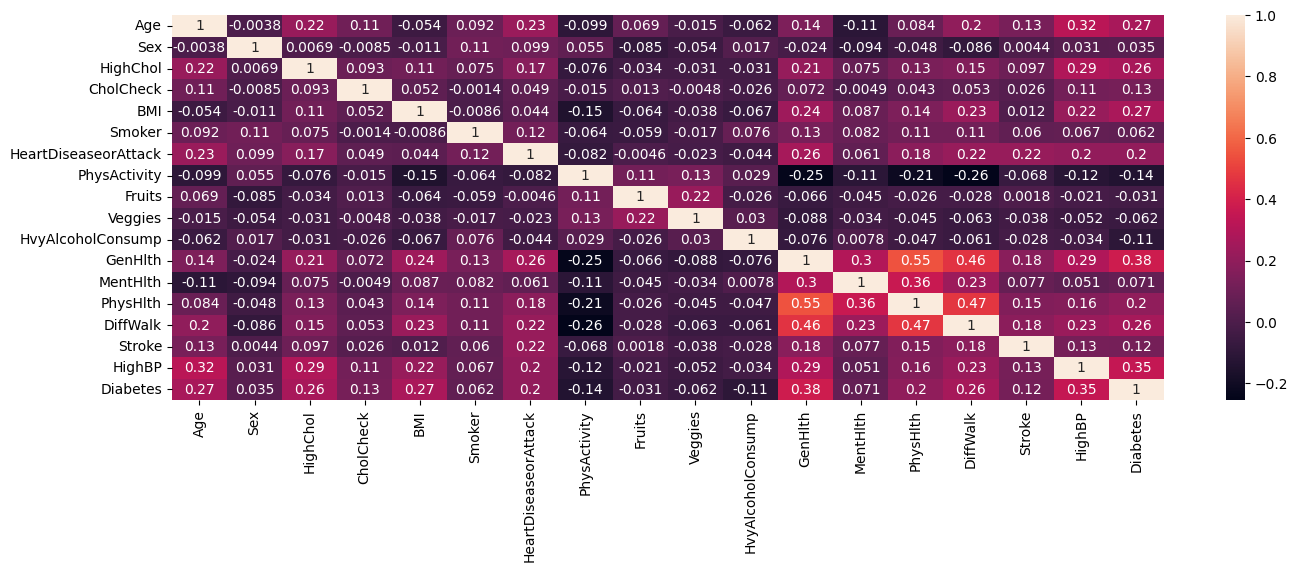

In [13]:
# Correlation Heatmap for Diabetes Data
plt.figure(figsize = (16,5))
corr = diabetes_data.corr()
sns.heatmap(corr, annot=True)

### How does diabetes value correlates with all the other attributes?

In [14]:
corr['Diabetes']

Age                     0.268049
Sex                     0.035165
HighChol                0.264501
CholCheck               0.126594
BMI                     0.272951
Smoker                  0.062325
HeartDiseaseorAttack    0.202174
PhysActivity           -0.138712
Fruits                 -0.031330
Veggies                -0.061857
HvyAlcoholConsump      -0.106918
GenHlth                 0.379334
MentHlth                0.071141
PhysHlth                0.199846
DiffWalk                0.262060
Stroke                  0.120429
HighBP                  0.351481
Diabetes                1.000000
Name: Diabetes, dtype: float64

# EDA on Hypertension Dataset

Does the hypertension data contain any duplicates?

In [15]:
# Duplicates present
check_duplicates(hypertension_data, "Hypertension Dataset")
# Removing duplicates
hypertension_data = hypertension_data.drop_duplicates()

----- Duplicate check for  Hypertension Dataset -----
Total number of rows: 26083
Number of duplicate rows: 0
Number of unique rows after removing duplicates: 26083


Does our dataset have any null attributes for any record?

In [16]:
# Checking for any Null values in the dataset
print(hypertension_data.isnull().sum())

age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64


### How many unique values are present for each attribute?

In [17]:
# Checking for all the unique values:
find_unique_values(hypertension_data, "Hypertension Dataset")

          Unique_Values
age                  88
sex                   2
cp                    4
trestbps             49
chol                152
fbs                   2
restecg               3
thalach              91
exang                 2
oldpeak              40
slope                 3
ca                    5
thal                  4
target                2


### Does multivariate attributes contain any outliers?

In [18]:
# Checking for outliers for the columns Age, BMI, GenHlth, MentHlth, PhysHlth
cols = ["age", "cp", "trestbps", "chol", "restecg", "thalach", "oldpeak", "slope", "ca", "thal"]
print("Outliers check for the Hypertension dataset")
for col in cols:
  print("Unique values of ", col, " :")
  print(hypertension_data[col].unique())
  find_outliers(hypertension_data, col)


Outliers check for the Hypertension dataset
Unique values of  age  :
[57. 64. 52. 56. 66. 51. 42. 38. 72. 47. 55. 63. 41. 81. 70. 62. 75. 69.
 39. 50. 59. 49. 34. 46. 40. 33. 67. 54. 60. 61. 45. 68. 58. 43. 65. 74.
 53. 76. 48. 44. 87. 71. 78. 77. 82. 73. 32. 29. 36. 83. 27. 84. 35. 31.
 86. 79. 80. 37. 22. 30. 28. 88. 85. 26. 25. 21. 23. 24. 19. 17. 12. 20.
 18. 16. 15. 11. 13. 14. 91. 97. 92. 93. 94. 96. 89. 90. 98. 95.]
Outliers for the column (using IQR range)  age  : 
[]
Outliers for the column (using Z-score)  age  : 
[]
Unique values of  cp  :
[3 2 1 0]
Outliers for the column (using IQR range)  cp  : 
[]
Outliers for the column (using Z-score)  cp  : 
[]
Unique values of  trestbps  :
[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
Outliers for the column (using IQR range)  trestbps  : 
[172 178 180 200 174 192]
Outliers for the 

### Is our dataset biased towards any hypertension result?

Text(0.5, 1.0, 'Hypertension')

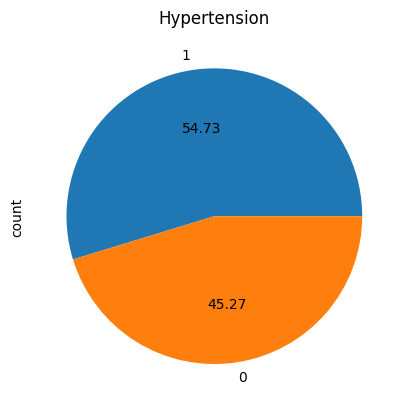

In [19]:
hypertension_data['target'].value_counts().plot(kind="pie", autopct="%.2f")
plt.title("Hypertension")

### Understanding the variability/spread of the data

Column :  age


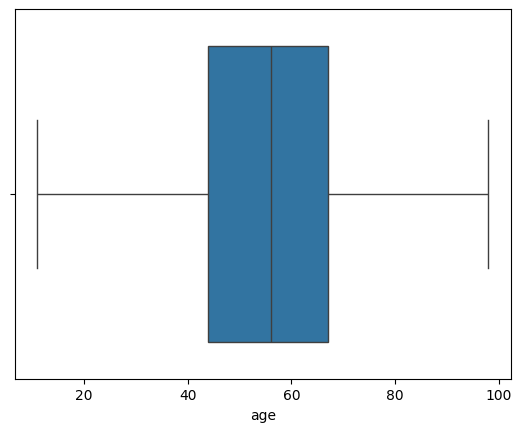

Column :  sex


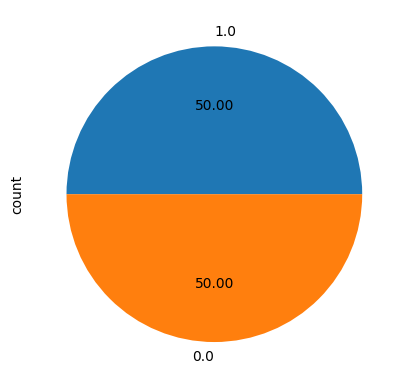

Column :  cp


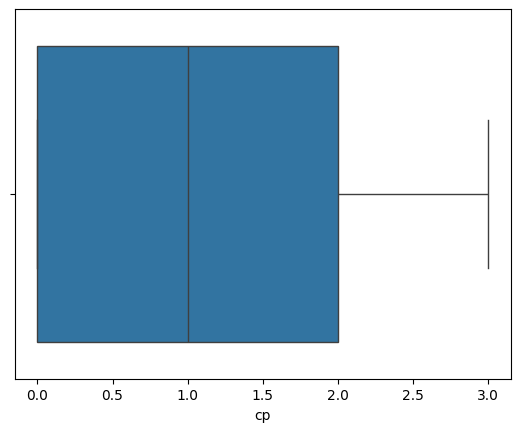

Column :  trestbps


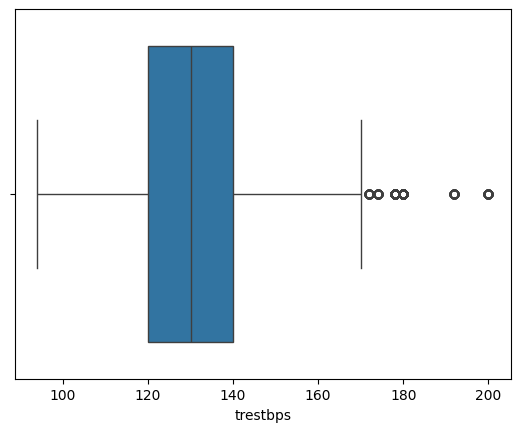

Column :  chol


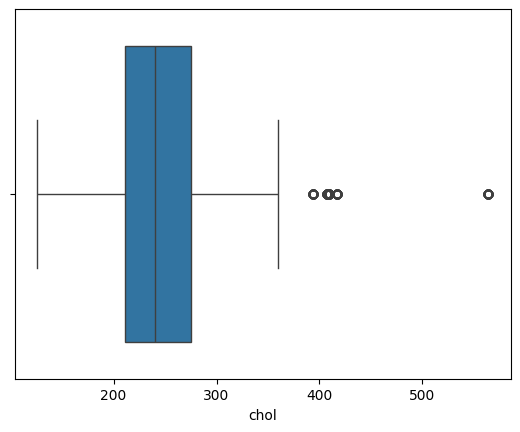

Column :  fbs


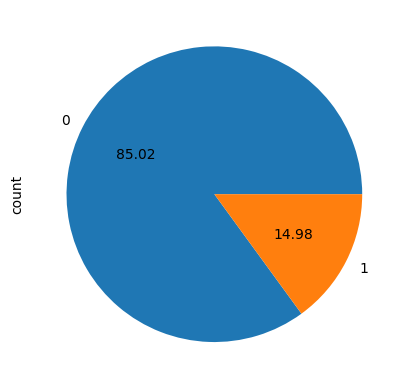

Column :  restecg


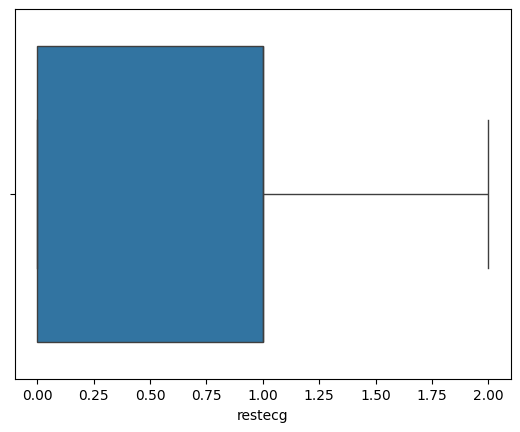

Column :  thalach


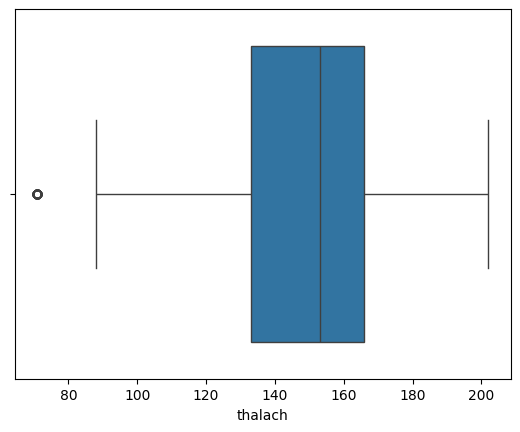

Column :  exang


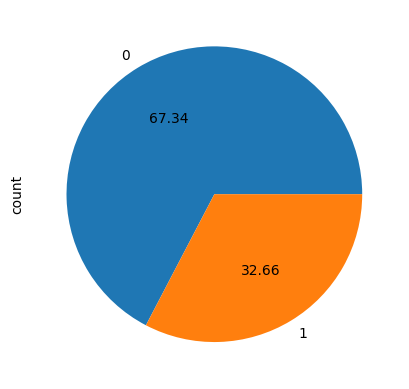

Column :  oldpeak


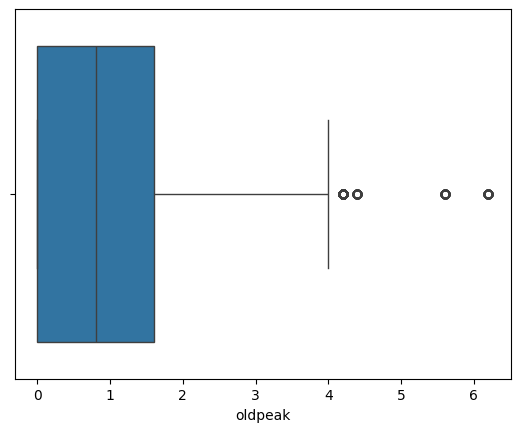

Column :  slope


Column :  ca


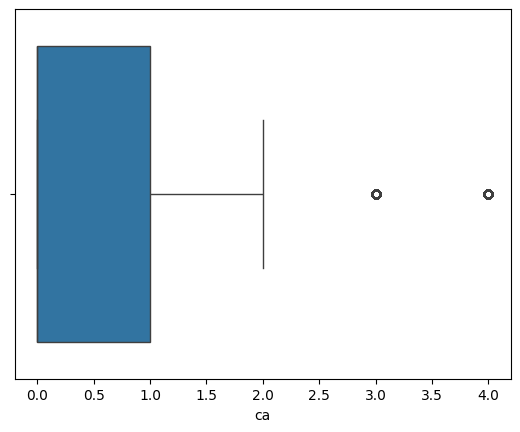

Column :  thal


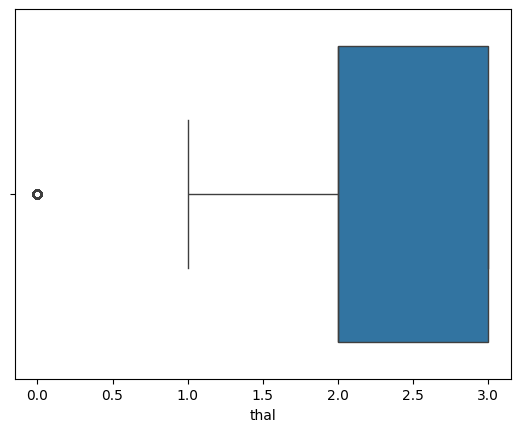

Column :  target


In [20]:
# Display boxplots
for col in hypertension_data.columns:
  print("Column : ", col)
  # sns.boxplot(x=hypertension_data[col])
  # plt.show()
  if hypertension_data[col].nunique() == 2:
    # print(diabetes_data[col].value_counts())
    hypertension_data[col].value_counts().plot(kind="pie", autopct="%.2f")
  else:
    sns.boxplot(x=hypertension_data[col])
  plt.show()

### How does the attributes correlate with each other?

<Axes: >

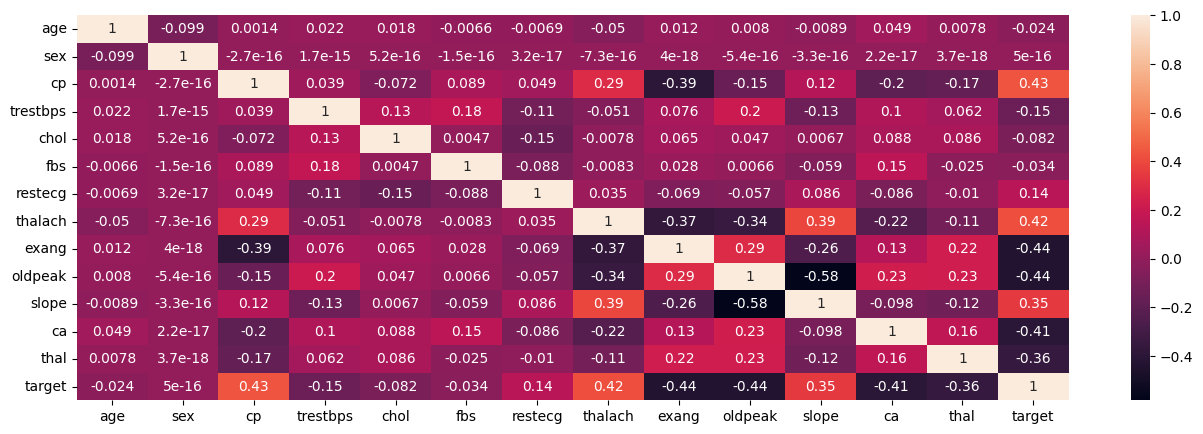

In [21]:
# Correlation Heatmap for Diabetes Data
plt.figure(figsize = (16,5))
corr = hypertension_data.corr()
sns.heatmap(corr, annot=True)

### How does hypertension value correlates with all the other attributes?

In [22]:
corr['target']

age        -2.354715e-02
sex         4.951044e-16
cp          4.338210e-01
trestbps   -1.485082e-01
chol       -8.211748e-02
fbs        -3.358049e-02
restecg     1.360681e-01
thalach     4.190405e-01
exang      -4.381167e-01
oldpeak    -4.381349e-01
slope       3.498362e-01
ca         -4.059577e-01
thal       -3.579344e-01
target      1.000000e+00
Name: target, dtype: float64

# EDA on Stroke Dataset

Does the hypertension data contain any duplicates?

In [23]:
# Duplicates present
check_duplicates(stroke_data, "Stroke Dataset")
# Removing duplicates
stroke_data = stroke_data.drop_duplicates()

----- Duplicate check for  Stroke Dataset -----
Total number of rows: 40910
Number of duplicate rows: 0
Number of unique rows after removing duplicates: 40910


Does our dataset have any null attributes for any record?

In [24]:
# Checking for any Null values in the dataset
print(stroke_data.isnull().sum())

sex                  3
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


### How many unique values are present for each attribute?

In [25]:
# Checking for all the unique values:
find_unique_values(stroke_data, "Stroke Dataset")

                   Unique_Values
sex                            2
age                          111
hypertension                   2
heart_disease                  2
ever_married                   2
work_type                      5
Residence_type                 2
avg_glucose_level           2903
bmi                          370
smoking_status                 2
stroke                         2


### Does multivariate attributes contain any outliers?

In [26]:
# Checking for outliers for the columns Age, BMI, GenHlth, MentHlth, PhysHlth
cols = ["age", "avg_glucose_level", "bmi"]
print("Outliers check for the Hypertension dataset")
for col in cols:
  print("Unique values of ", col, " :")
  print(stroke_data[col].unique())
  find_outliers(stroke_data, col)


Outliers check for the Hypertension dataset
Unique values of  age  :
[ 63.  42.  61.  41.  85.  55.  82.  17.  31.  39.  26.  19.  78.  45.
  50.  53.  71.  64.  75.  67.  40.  23.  33.  65.  83.  79.  62.  58.
  34.  27.  68.  52.  49.  13.  60.  24.  11.  47.  70.  38.  59.  36.
  77.  54.  93.  29.  51.  21.  56.  20.  46.  72.  37.  18.  66.  25.
  57.  16.  80.  28.  84.  44.  43.  76.  48.   8.  14.  88.  69.  22.
  15.  32.  35.  73.  81.  74.  30.  86.  92.   5.  91.   6.  87.   7.
   9.  12.  10.  89.  90.   4.   1.   3.  -2.  -5.  -4.  -3.  -1.   2.
   0.  -6.  -9.  95. 103.  94.  98.  96. 102. 101.  97.  99. 100.]
Outliers for the column (using IQR range)  age  : 
[]
Outliers for the column (using Z-score)  age  : 
[]
Unique values of  avg_glucose_level  :
[228.69 105.92 171.23 ... 125.2   82.99 166.29]
Outliers for the column (using IQR range)  avg_glucose_level  : 
[]
Outliers for the column (using Z-score)  avg_glucose_level  : 
[]
Unique values of  bmi  :
[36.6 32.5 34.4

### Is our dataset biased towards any stroke result?

In [27]:
stroke_data['stroke'].value_counts().plot(kind="pie", autopct="%.2f")
plt.title("Stroke")

Text(0.5, 1.0, 'Stroke')

### Understanding the variability/spread of the data

Column :  sex


Column :  age


Column :  hypertension


Column :  heart_disease


Column :  ever_married


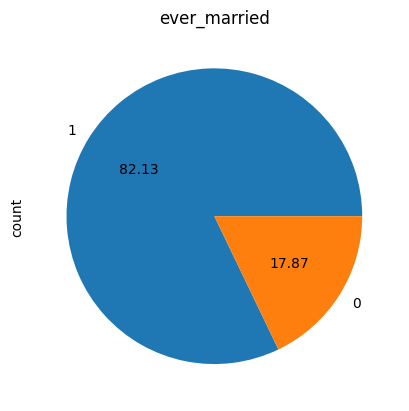

Column :  work_type


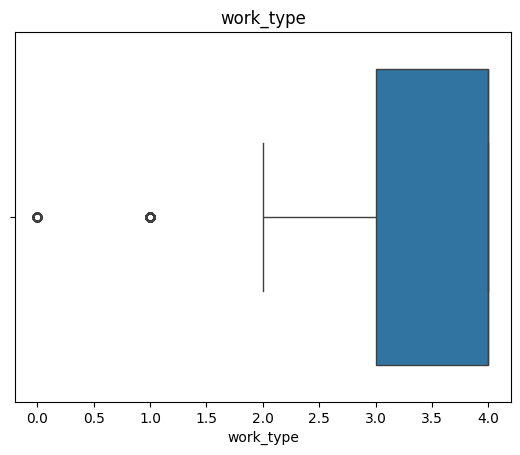

Column :  Residence_type


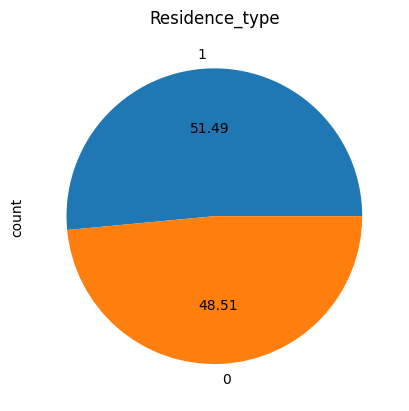

Column :  avg_glucose_level


Column :  bmi


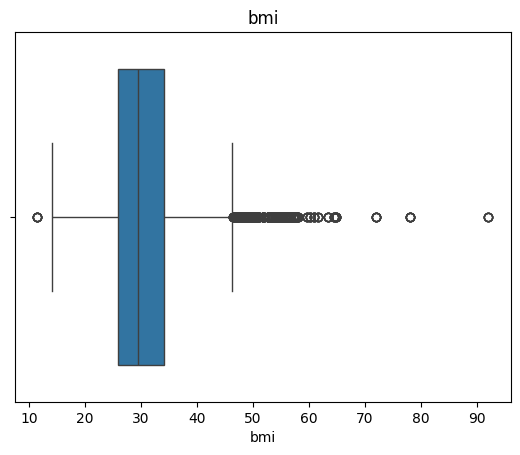

Column :  smoking_status


Column :  stroke


In [28]:
# Display boxplots
for col in stroke_data.columns:
  print("Column : ", col)
  # sns.boxplot(x=stroke_data[col])
  if stroke_data[col].nunique() == 2:
    # print(diabetes_data[col].value_counts())
    stroke_data[col].value_counts().plot(kind="pie", autopct="%.2f")
  else:
    sns.boxplot(x=stroke_data[col])
  plt.title(col)
  plt.show()

### How does the attributes correlate with each other?

<Axes: >

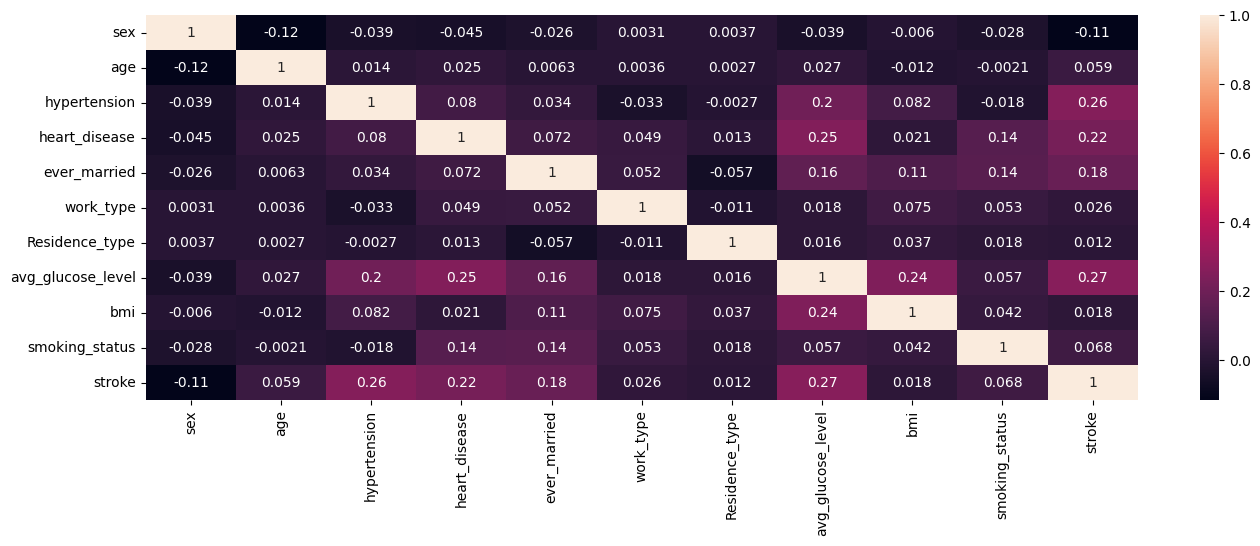

In [29]:
# Correlation Heatmap for Diabetes Data
plt.figure(figsize = (16,5))
corr = stroke_data.corr()
sns.heatmap(corr, annot=True)

### How does hypertension value correlates with all the other attributes?

In [30]:
corr['stroke']

sex                 -0.111036
age                  0.058534
hypertension         0.257182
heart_disease        0.223930
ever_married         0.181656
work_type            0.026494
Residence_type       0.011682
avg_glucose_level    0.265452
bmi                  0.018326
smoking_status       0.068368
stroke               1.000000
Name: stroke, dtype: float64

# EDA Good Ranges

## Diabetes Dataset

### Hypertension relation with other attributes in the Diabetes Dataset

<ipython-input-31-45892dced15a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highbp_0["Age"] *= 8
<ipython-input-31-45892dced15a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highbp_1["Age"] *= 8


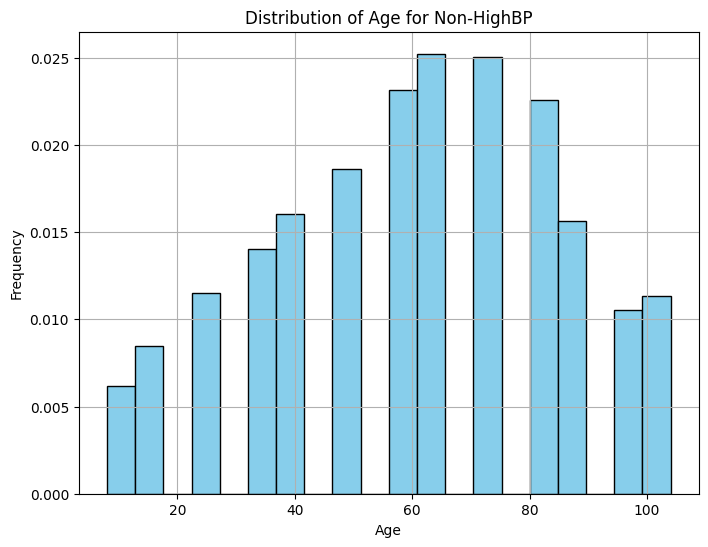

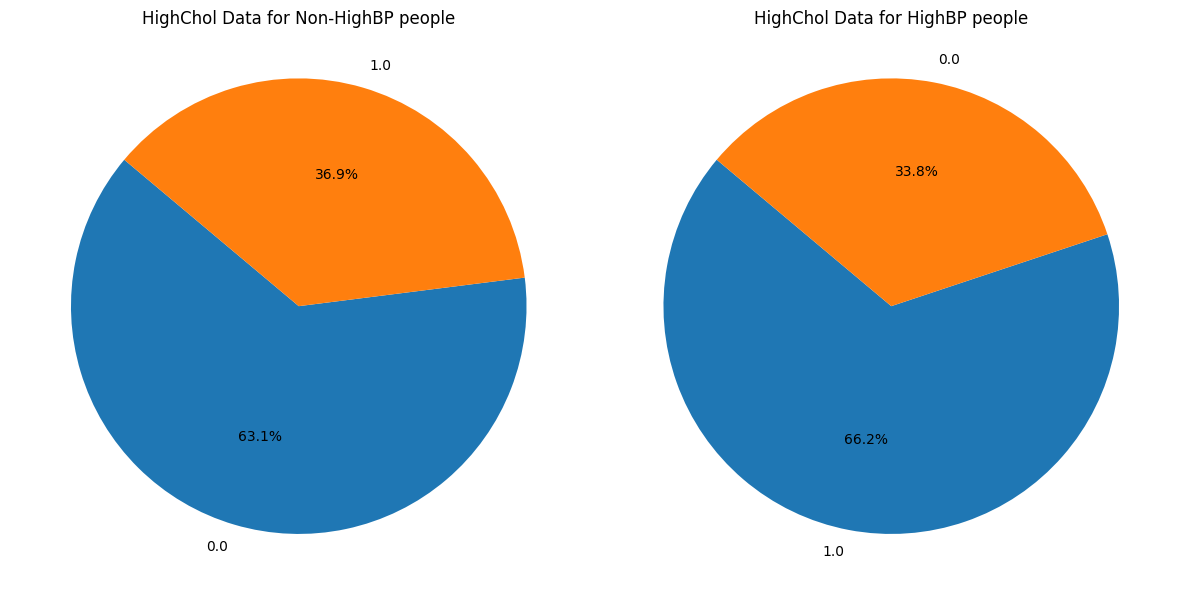

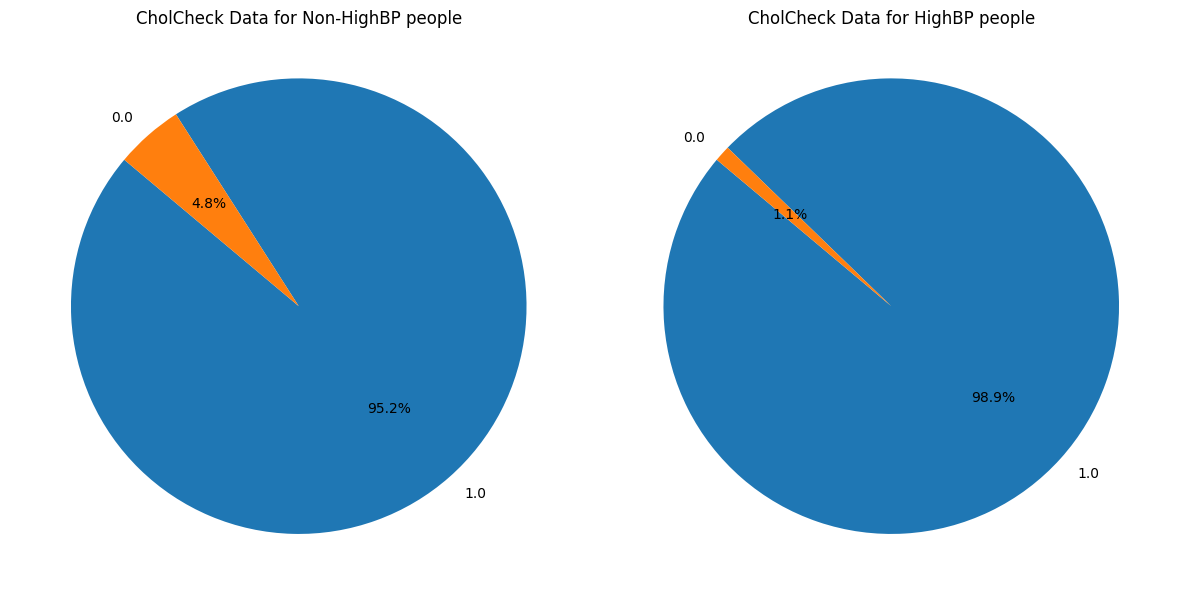

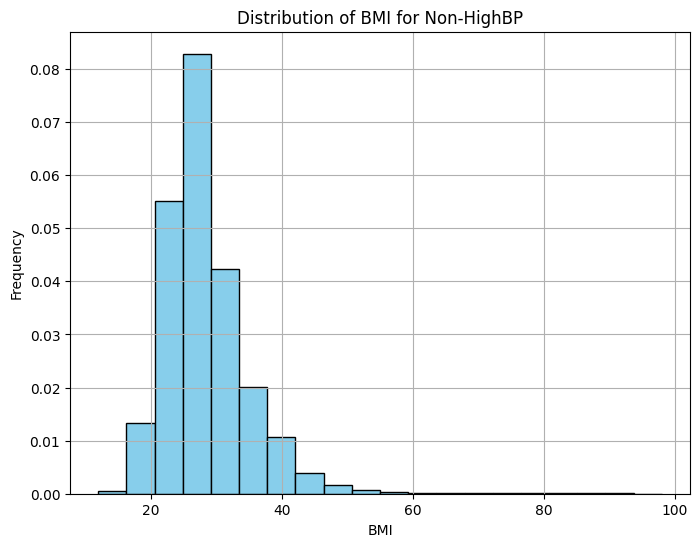

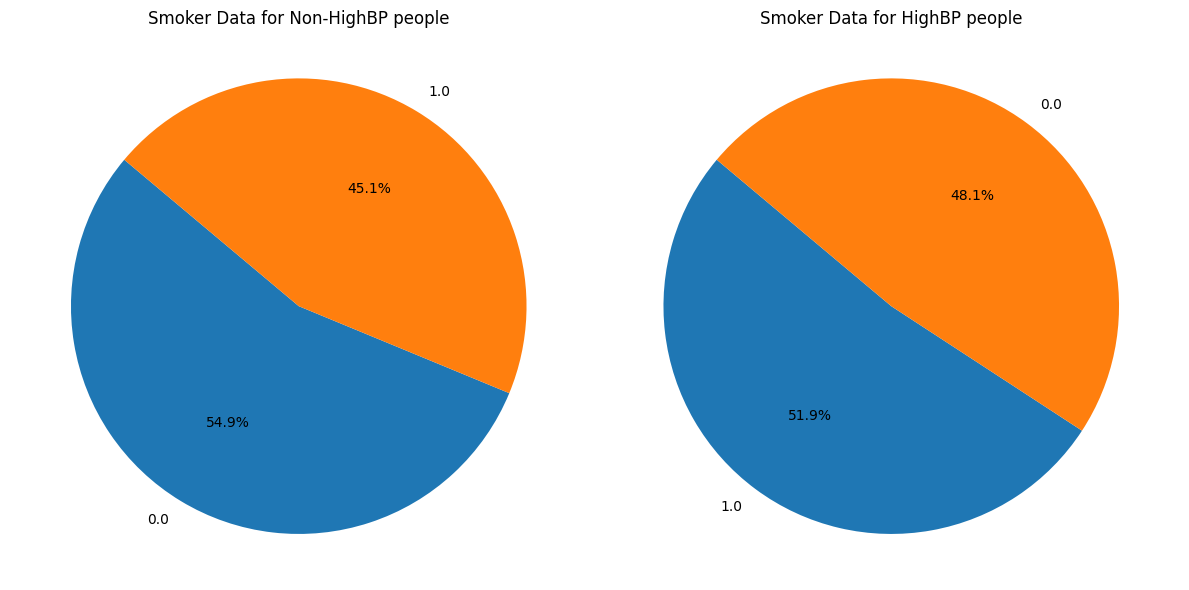

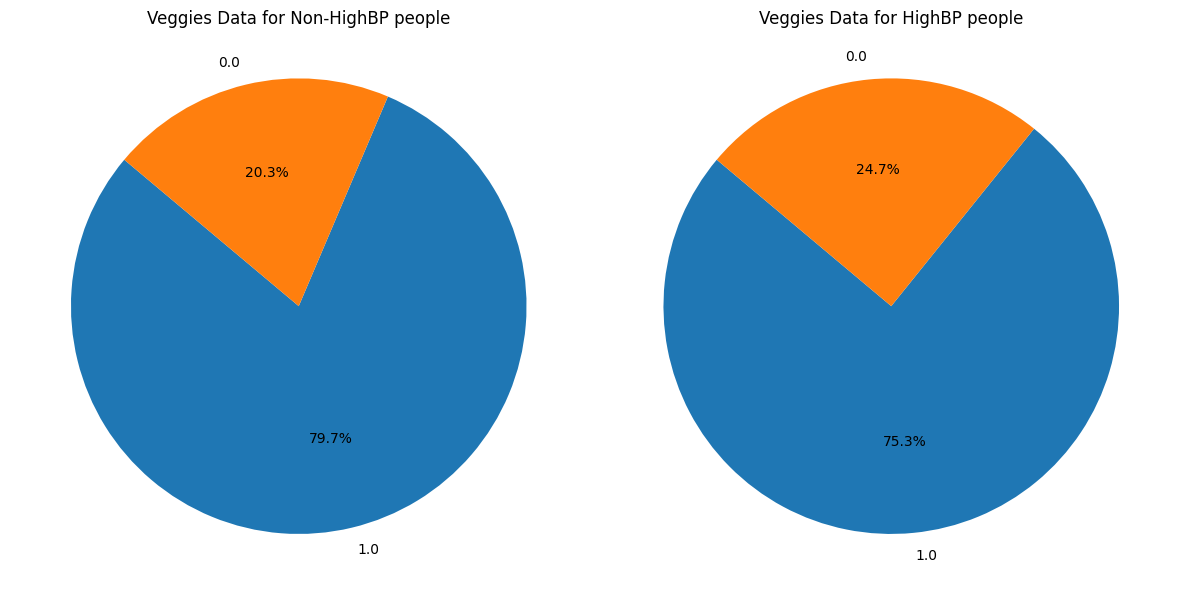

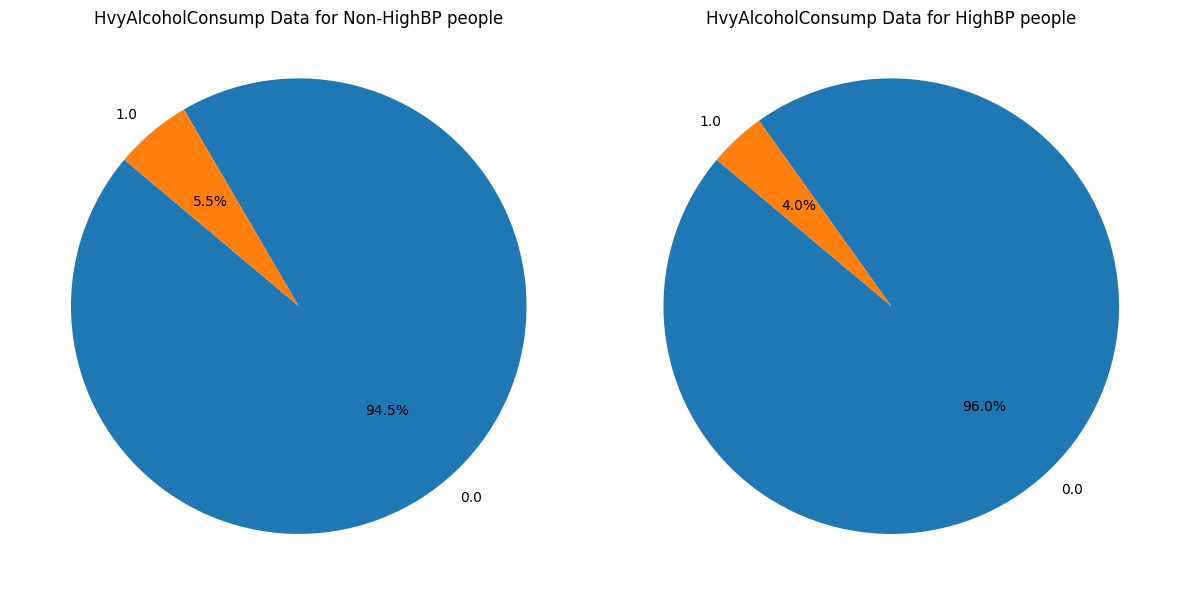

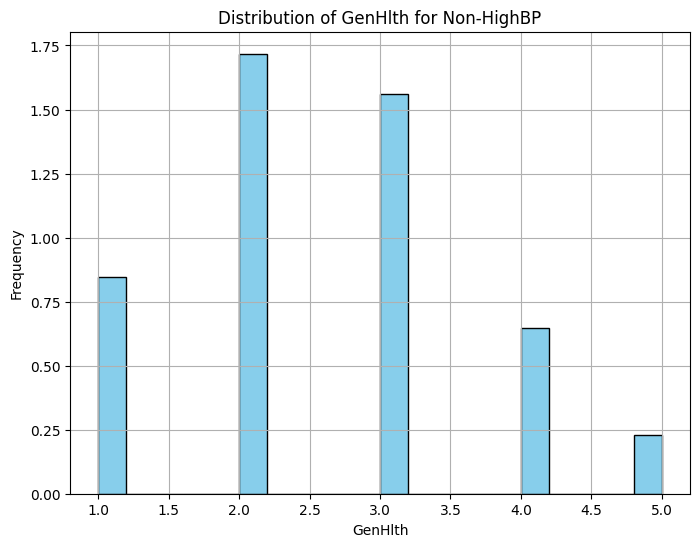

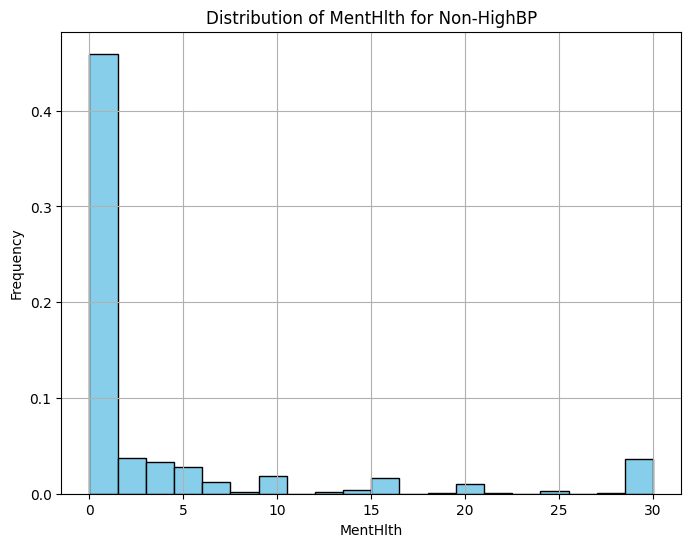

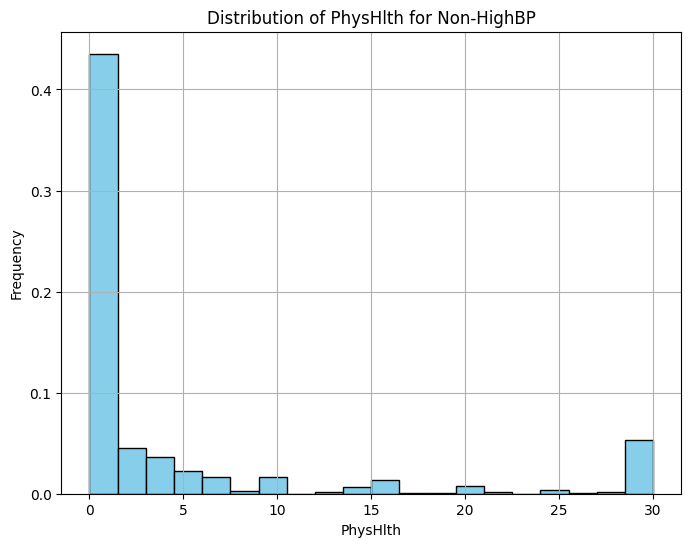

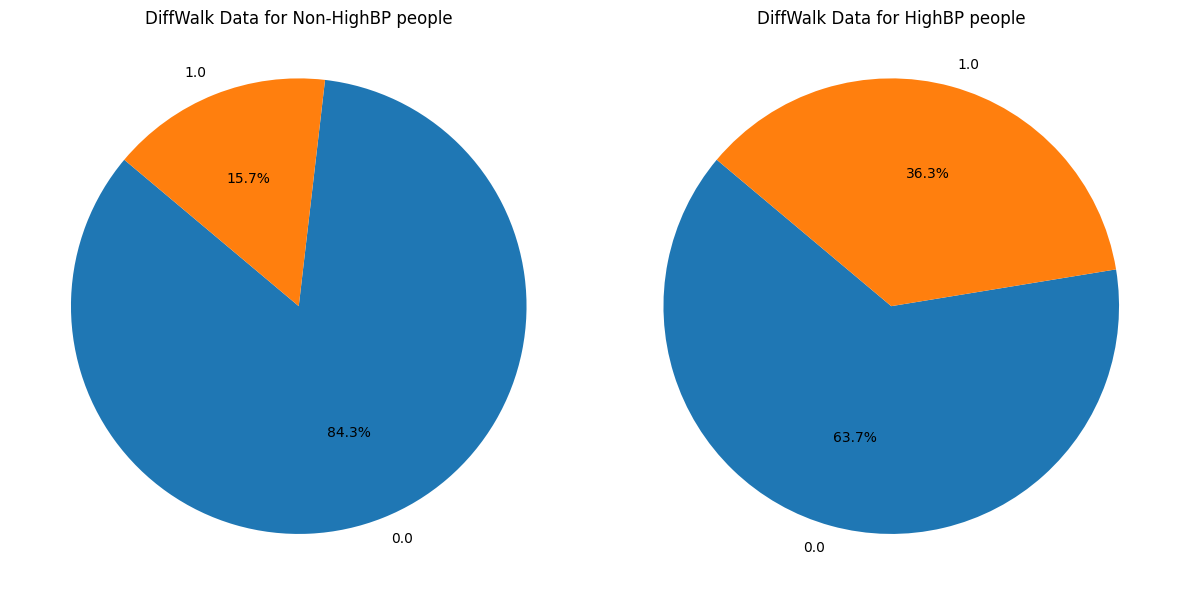

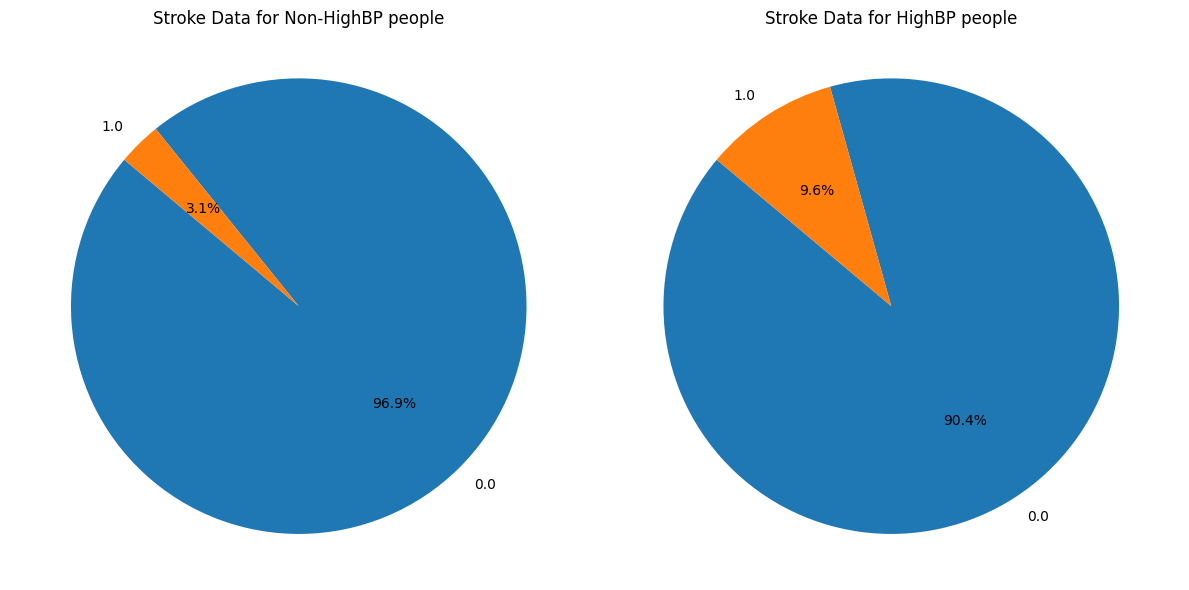

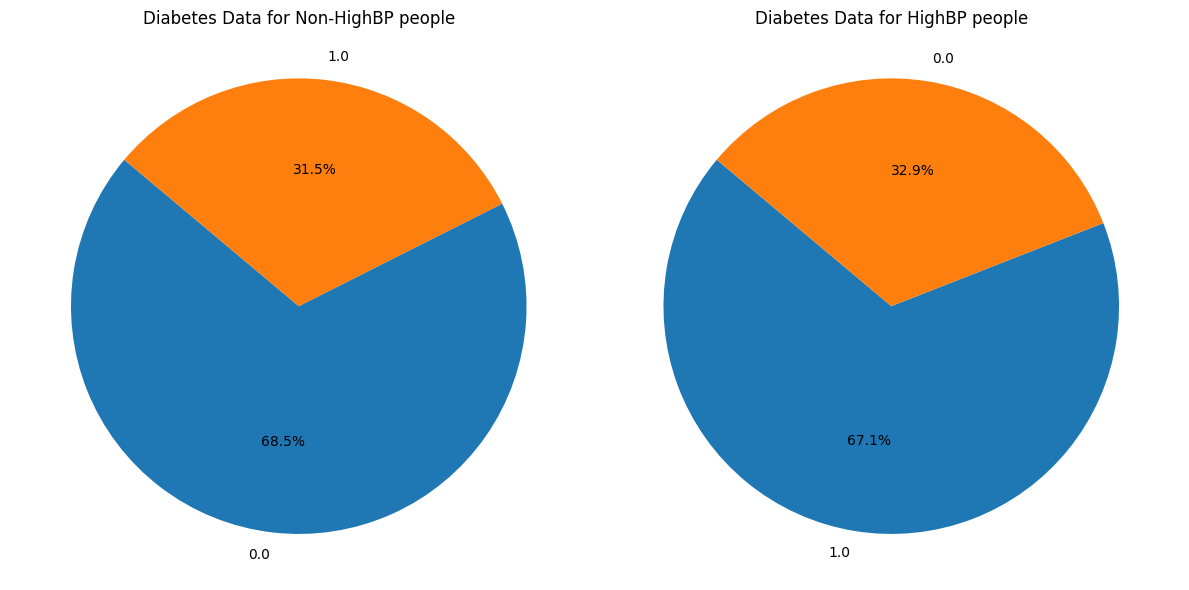

In [31]:
highbp_0 = diabetes_data[diabetes_data['HighBP'] == 0]
highbp_0["Age"] *= 8
highbp_1 = diabetes_data[diabetes_data['HighBP'] == 1]
highbp_1["Age"] *= 8

# Iterate through each attribute
for attribute in diabetes_data:
    if attribute == 'HighBP':
        continue
    if highbp_0[attribute].nunique() != 2:
        plt.figure(figsize=(8, 6))
        plt.hist(highbp_0[attribute], density=True, bins=20, color='skyblue', edgecolor='black')
        plt.title(f"Distribution of {attribute} for Non-HighBP")
        plt.xlabel(attribute)
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

        # Plot histogram for Non-HighBP individuals
        # plt.figure(figsize=(8, 6))
        # plt.hist(highbp_0[attribute], density=True, bins=20, color='skyblue', edgecolor='black', alpha=0.5, label='Non-HighBP')
        # Plot histogram for HighBP individuals
        # plt.hist(highbp_1[attribute], density=True, bins=20, color='orange', edgecolor='black', alpha=0.5, label='HighBP')
        # plt.title(f"Distribution of {attribute} for HighBP and Non-HighBP")
        # plt.xlabel(attribute)
        # plt.ylabel("Frequency")
        # plt.legend()
        # plt.grid(True)
        # plt.show()
    else:
        # Calculate value counts for the attribute in both HighBP and Non-HighBP datasets
        value_counts_0 = highbp_0[attribute].value_counts()
        value_counts_1 = highbp_1[attribute].value_counts()

        # Plot pie charts for Non-HighBP individuals and HighBP individuals side by side
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))

        # Non-HighBP Pie Chart
        axs[0].pie(value_counts_0, labels=value_counts_0.index, autopct='%1.1f%%', startangle=140)
        axs[0].set_title(f"{attribute} Data for Non-HighBP people")
        axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

        # HighBP Pie Chart
        axs[1].pie(value_counts_1, labels=value_counts_1.index, autopct='%1.1f%%', startangle=140)
        axs[1].set_title(f"{attribute} Data for HighBP people")
        axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

        plt.tight_layout()
        plt.show()

### Stroke relation with other attributes in the Diabetes Dataset

<ipython-input-32-dc8dc58a955e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_0["Age"] *= 8
<ipython-input-32-dc8dc58a955e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_1["Age"] *= 8


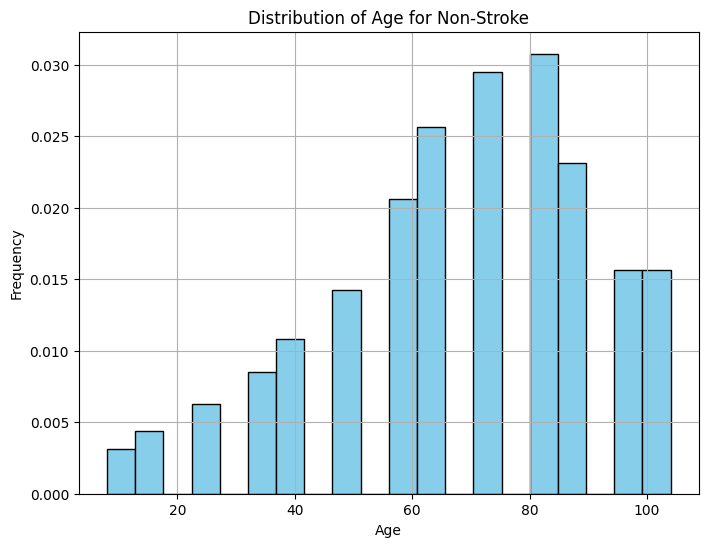

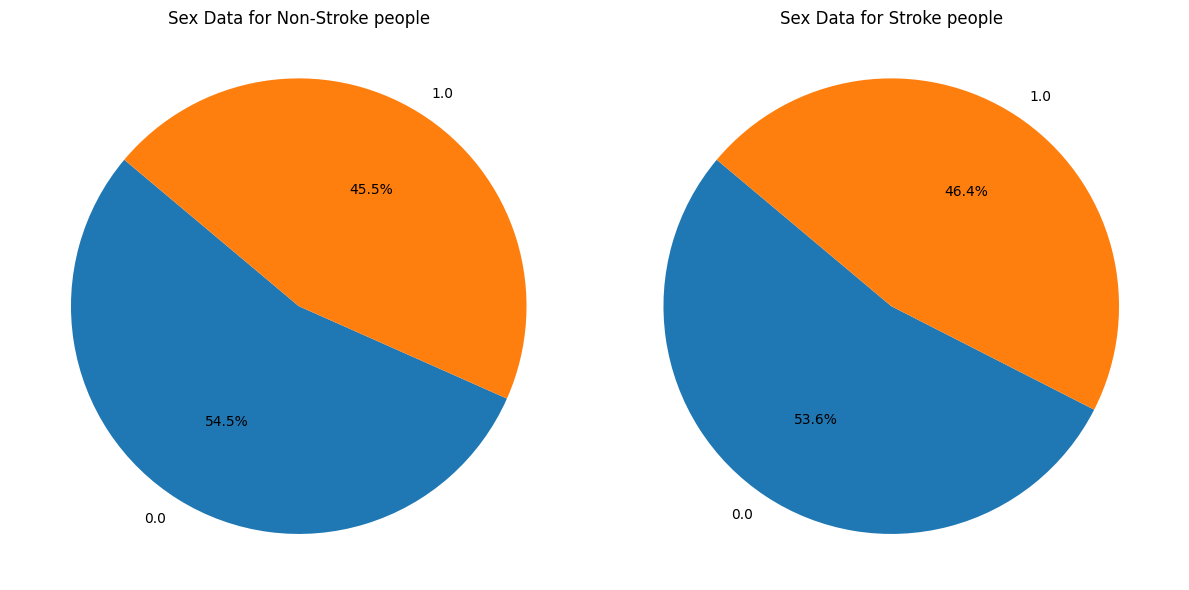

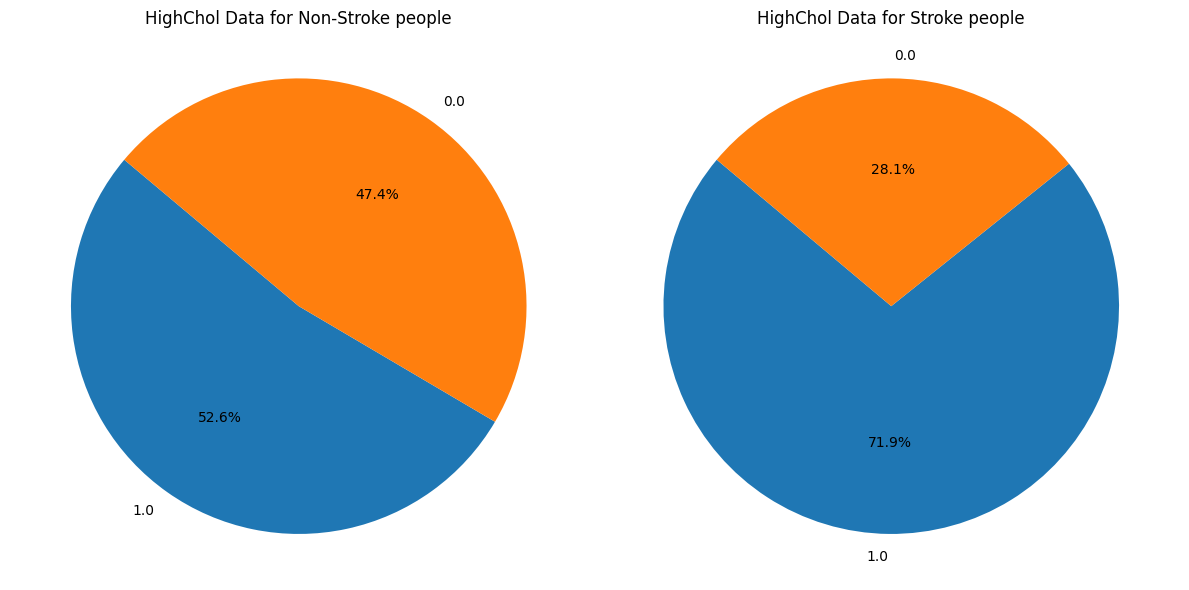

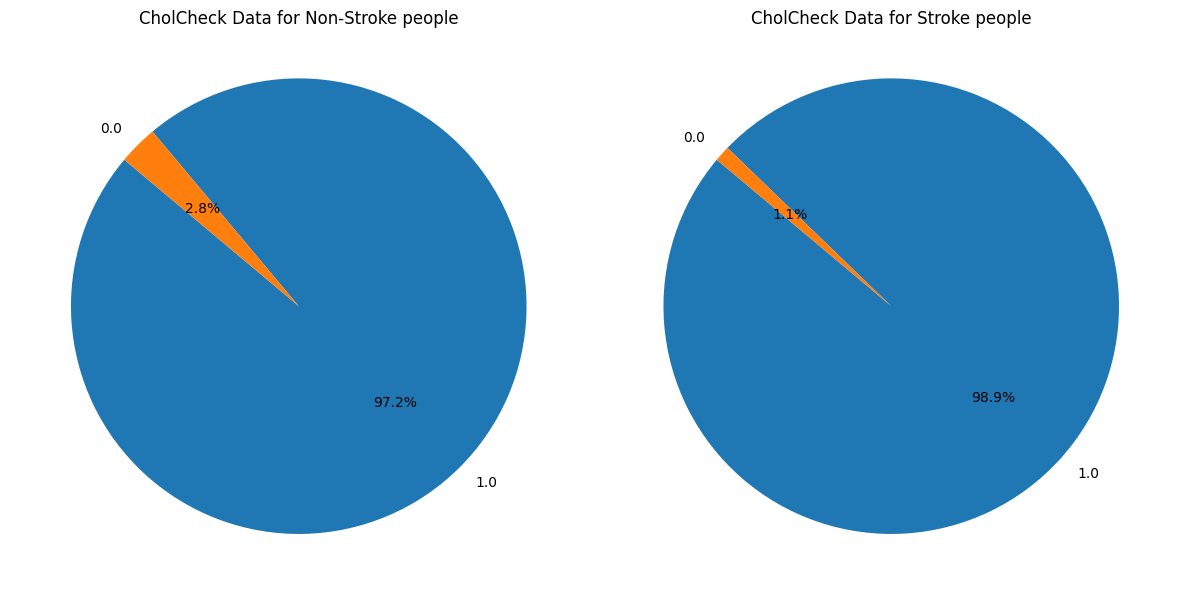

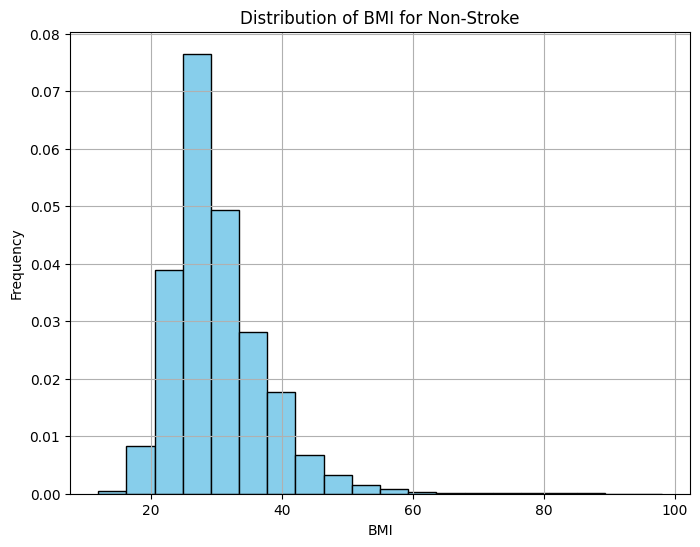

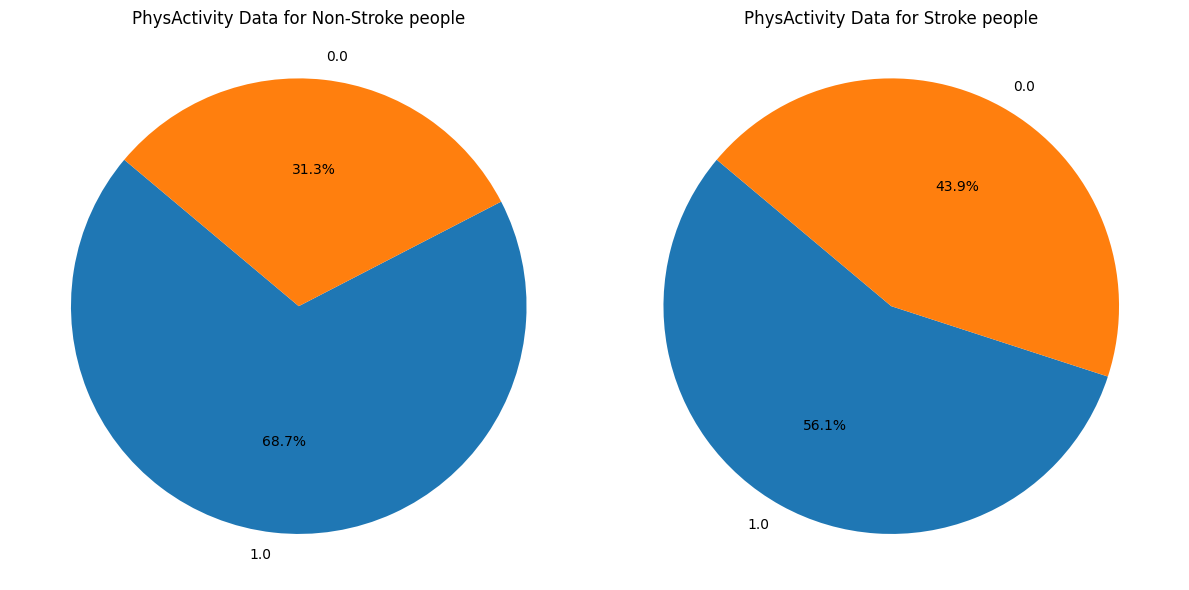

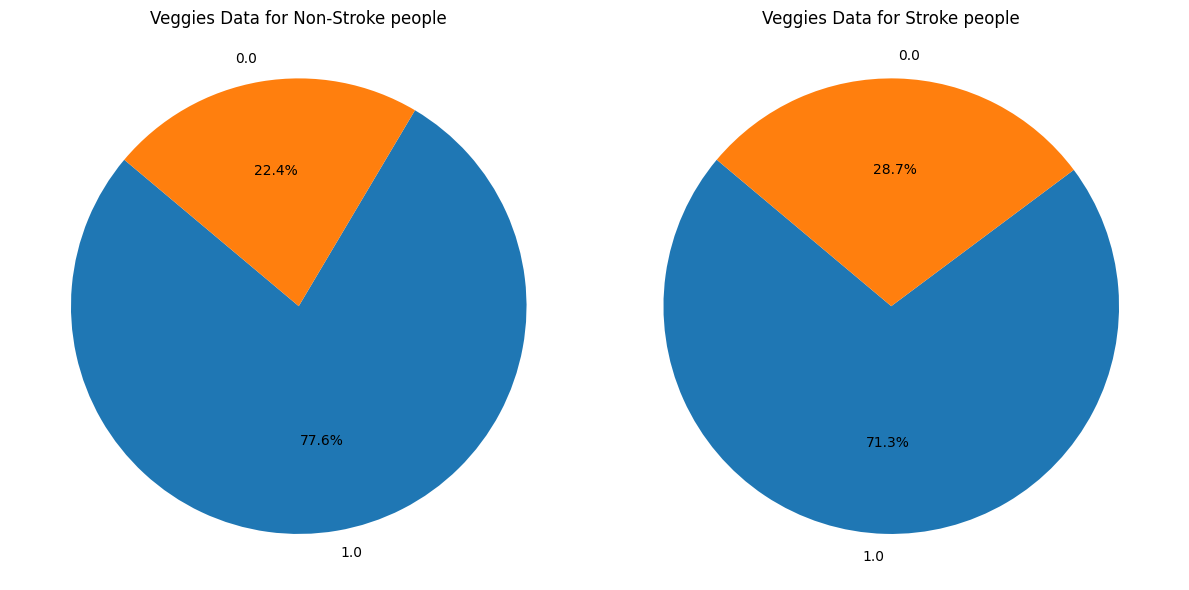

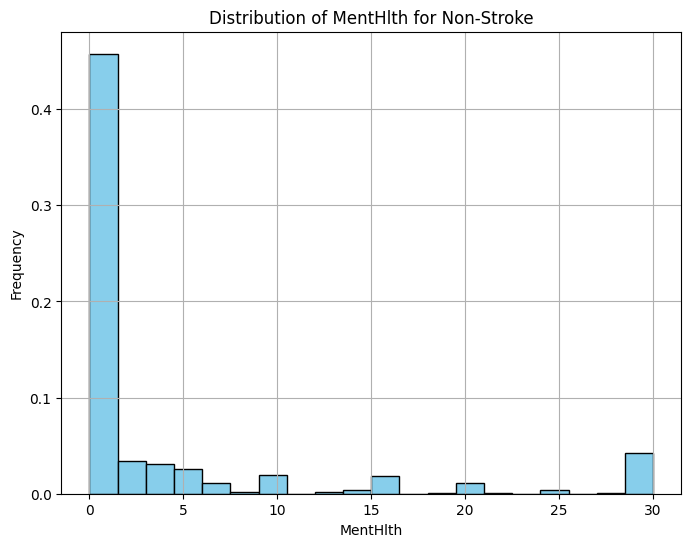

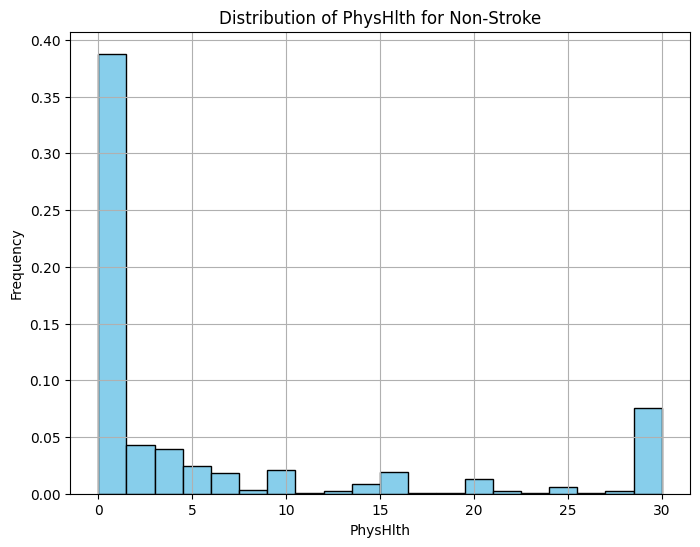

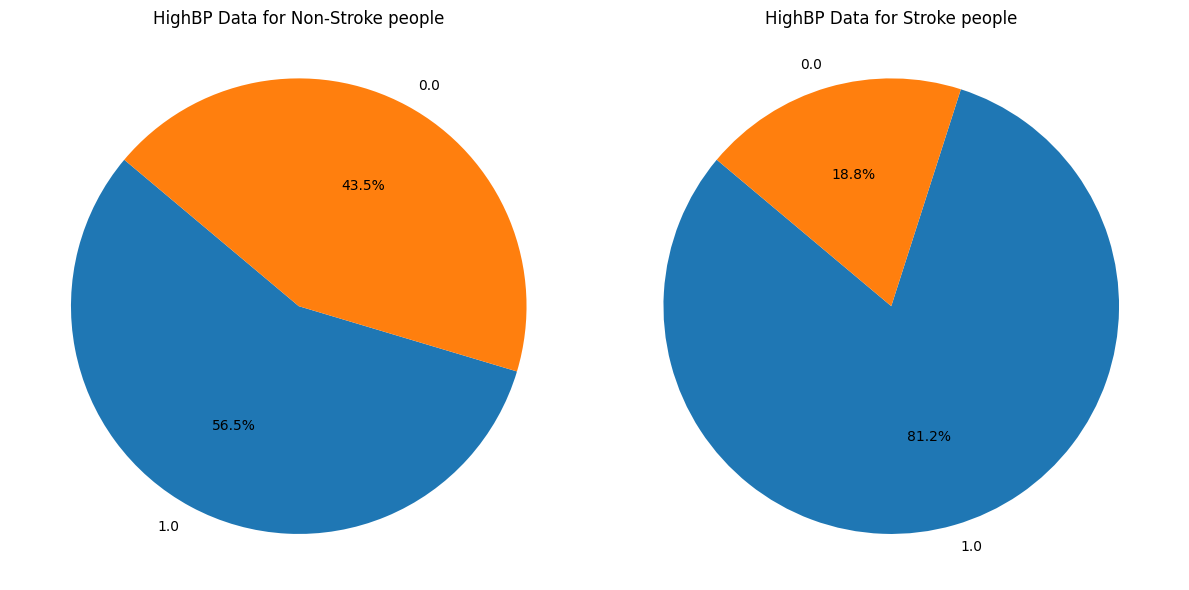

In [32]:
stroke_0 = diabetes_data[diabetes_data['Stroke'] == 0]
stroke_0["Age"] *= 8
stroke_1 = diabetes_data[diabetes_data['Stroke'] == 1]
stroke_1["Age"] *= 8

# Iterate through each attribute
for attribute in diabetes_data:
    if attribute == 'Stroke':
        continue
    if stroke_0[attribute].nunique() != 2:
        plt.figure(figsize=(8, 6))
        plt.hist(stroke_0[attribute], density=True, bins=20, color='skyblue', edgecolor='black')
        plt.title(f"Distribution of {attribute} for Non-Stroke")
        plt.xlabel(attribute)
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

        # Plot histogram for Non-Stroke individuals
        # plt.figure(figsize=(8, 6))
        # plt.hist(stroke_0[attribute], density=True, bins=20, color='skyblue', edgecolor='black', alpha=0.5, label='Non-Stroke')
        # Plot histogram for Stroke individuals
        # plt.hist(stroke_1[attribute], density=True, bins=20, color='orange', edgecolor='black', alpha=0.5, label='Stroke')
        # plt.title(f"Distribution of {attribute} for Stroke and Non-Stroke")
        # plt.xlabel(attribute)
        # plt.ylabel("Frequency")
        # plt.legend()
        # plt.grid(True)
        # plt.show()
    else:
        # Calculate value counts for the attribute in both Stroke and Non-Stroke datasets
        value_counts_0 = stroke_0[attribute].value_counts()
        value_counts_1 = stroke_1[attribute].value_counts()

        # Plot pie chart for Non-Stroke individuals and Stroke individuals side by side
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))

        # Non-Stroke Pie Chart
        axs[0].pie(value_counts_0, labels=value_counts_0.index, autopct='%1.1f%%', startangle=140)
        axs[0].set_title(f"{attribute} Data for Non-Stroke people")
        axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

        # Stroke Pie Chart
        axs[1].pie(value_counts_1, labels=value_counts_1.index, autopct='%1.1f%%', startangle=140)
        axs[1].set_title(f"{attribute} Data for Stroke people")
        axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

        plt.tight_layout()
        plt.show()

### Diabetes relation with other attributes in the Diabetes Dataset

<ipython-input-33-a9cceed2120e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_0["Age"] *= 8
<ipython-input-33-a9cceed2120e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_1["Age"] *= 8


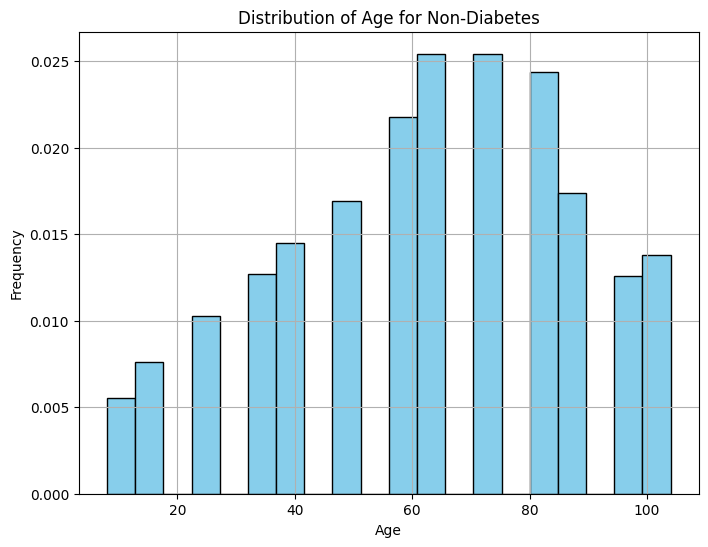

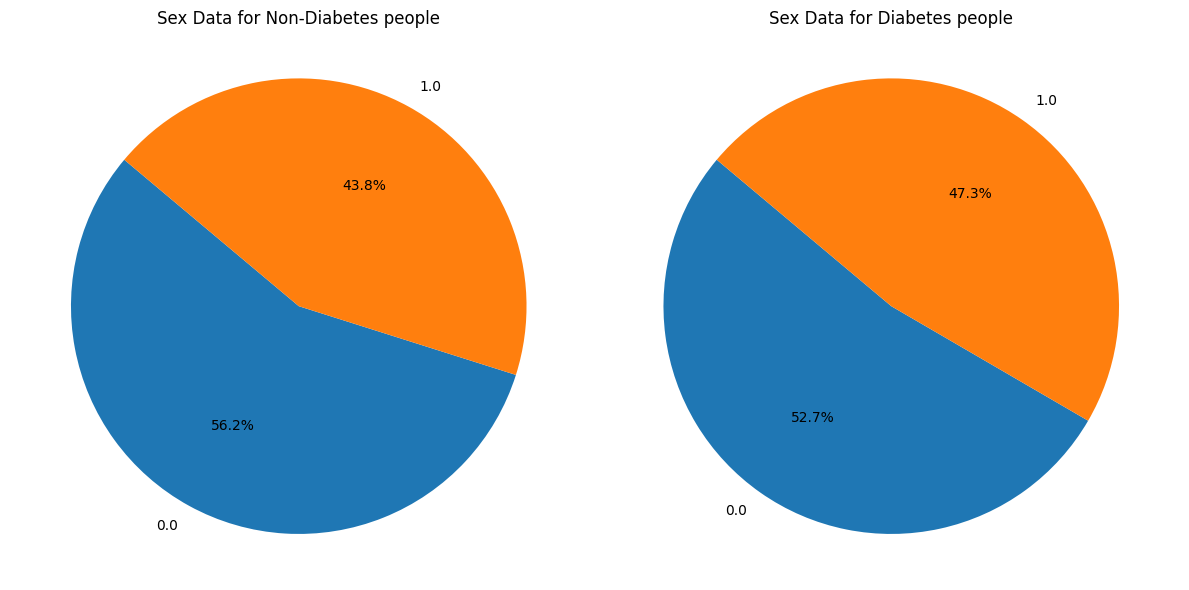

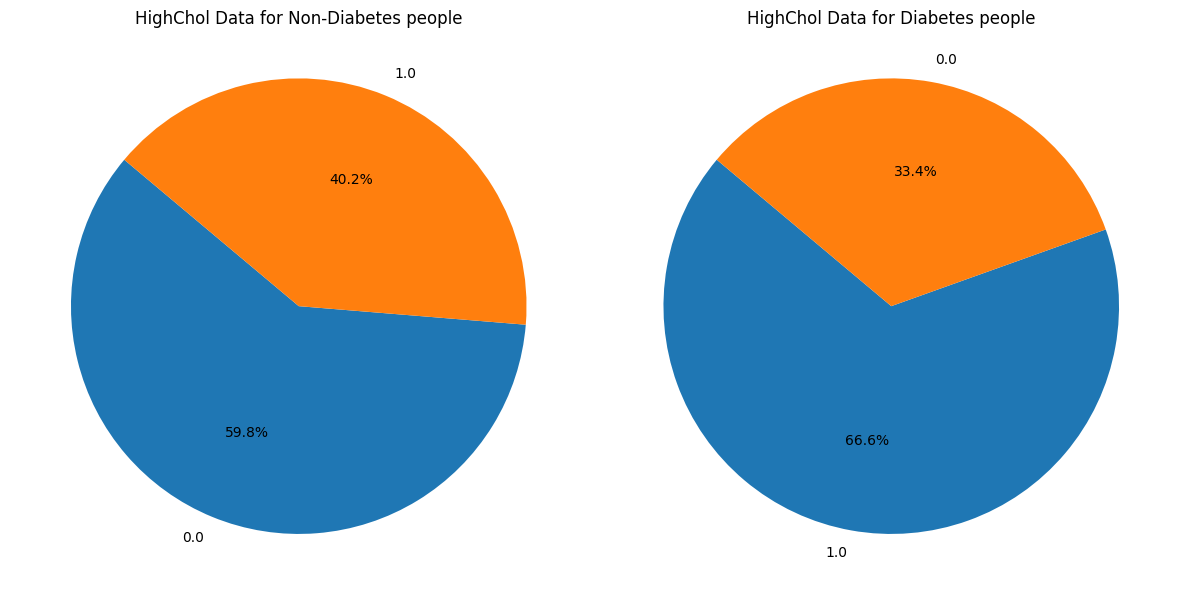

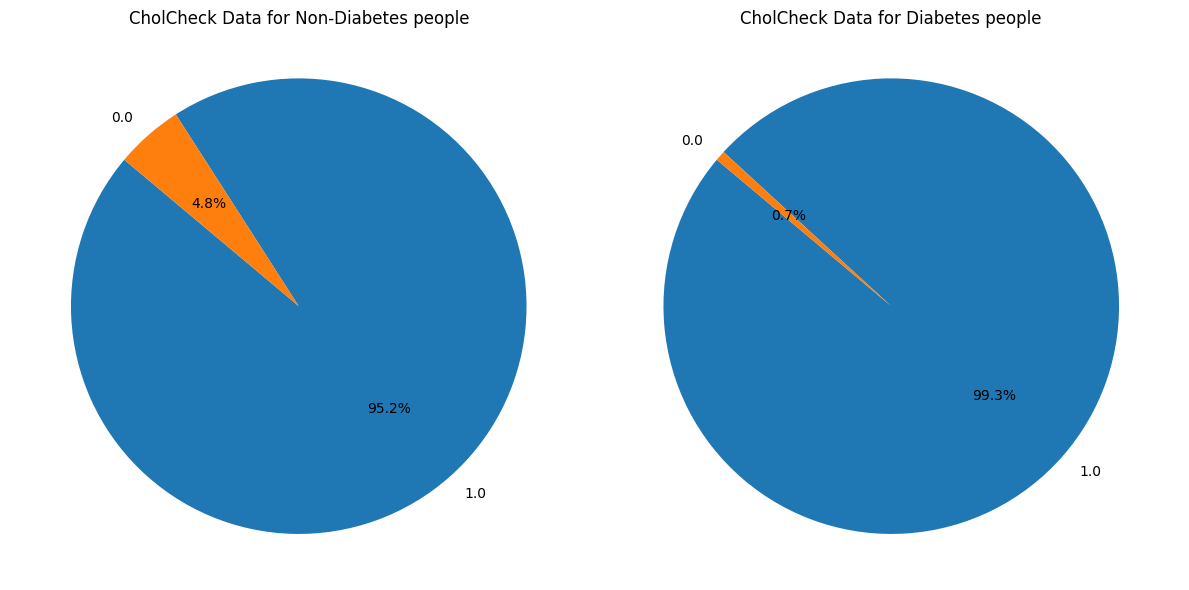

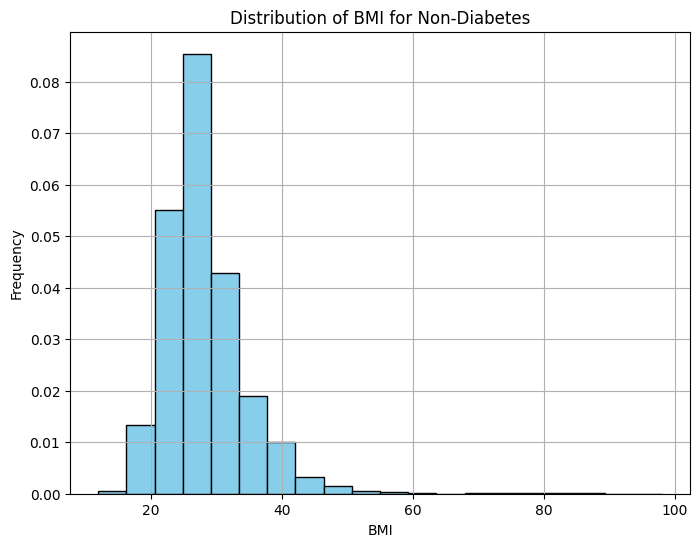

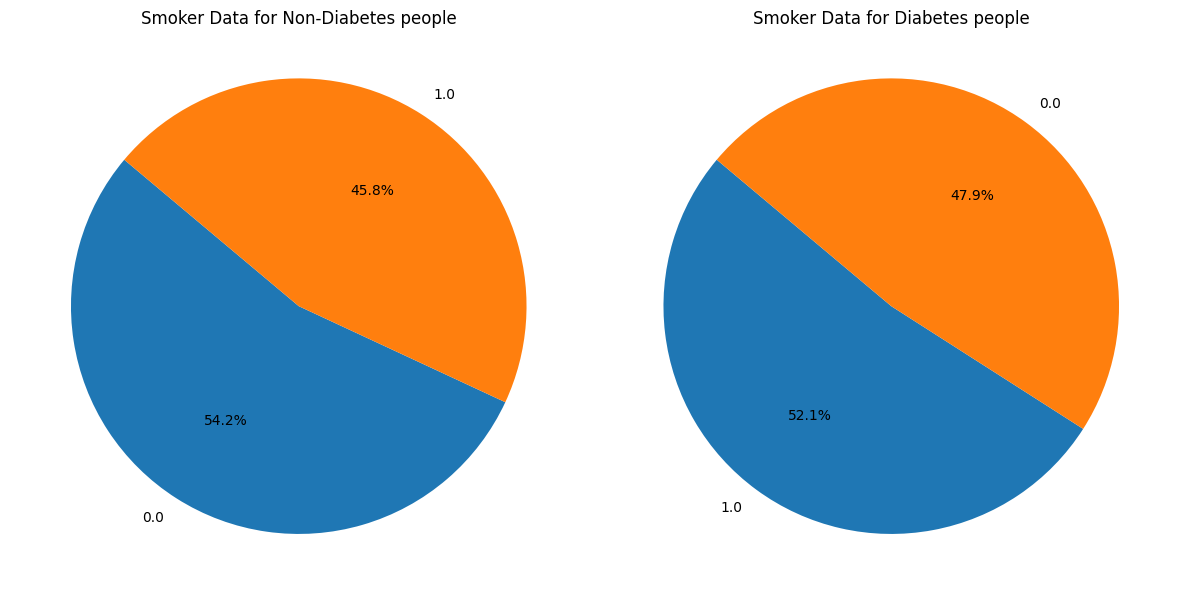

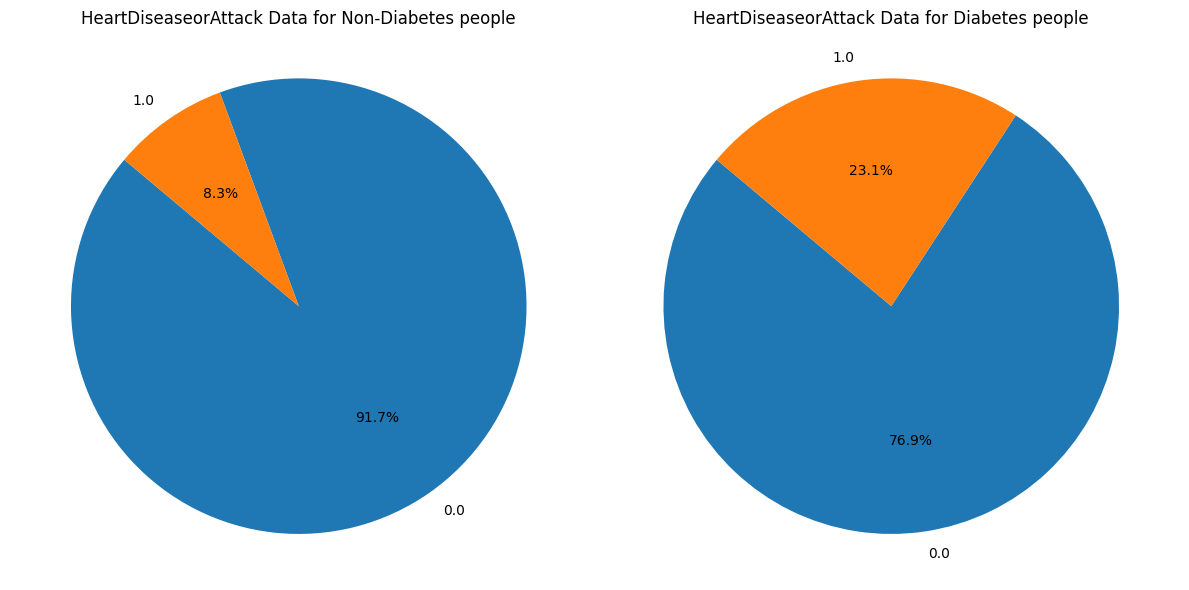

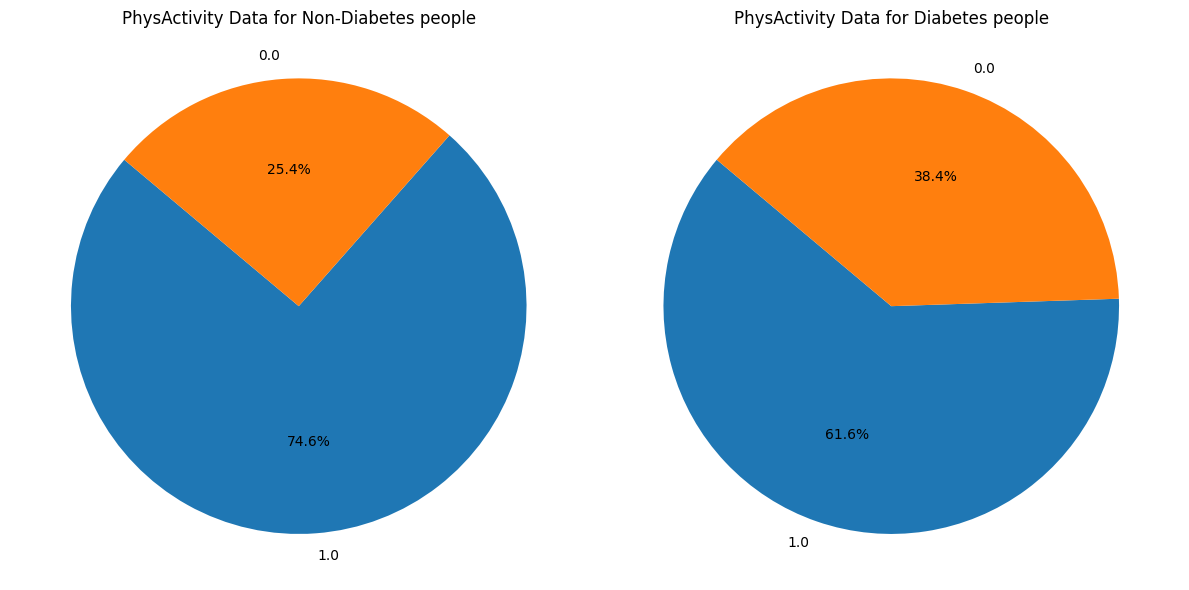

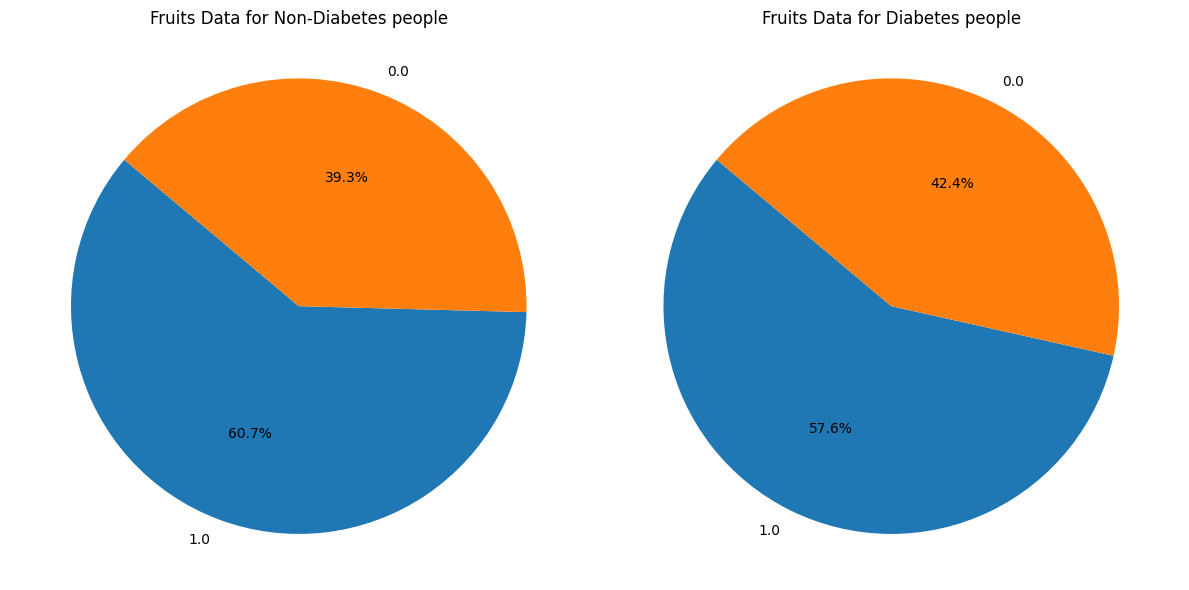

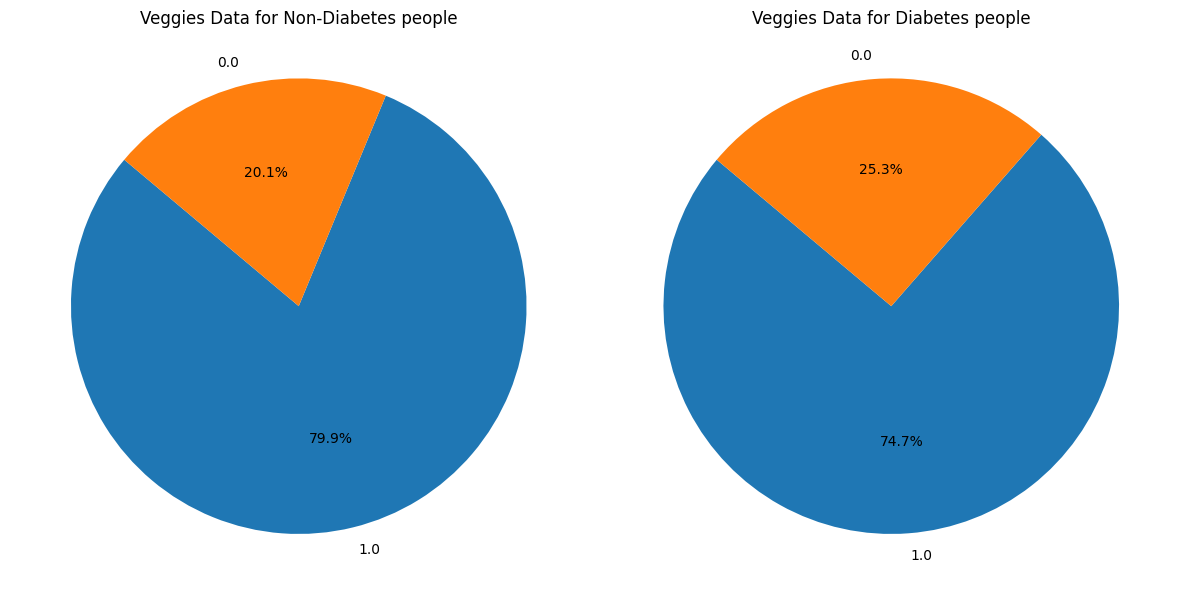

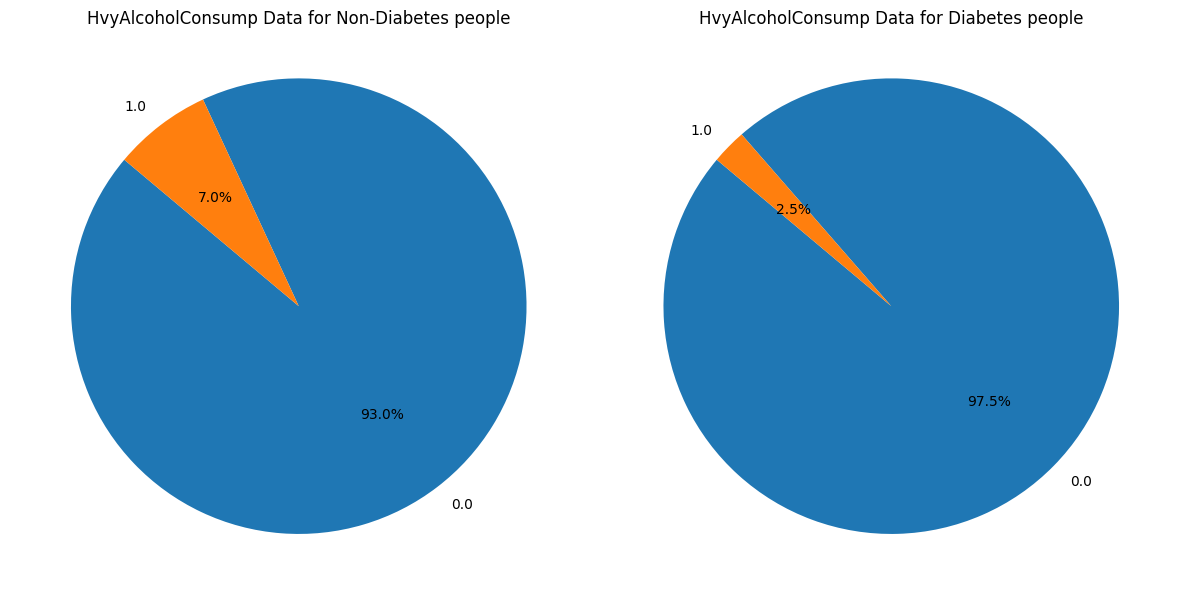

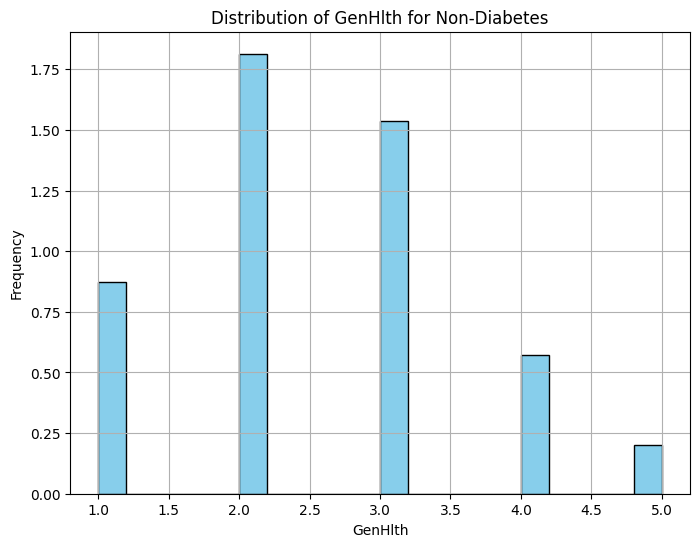

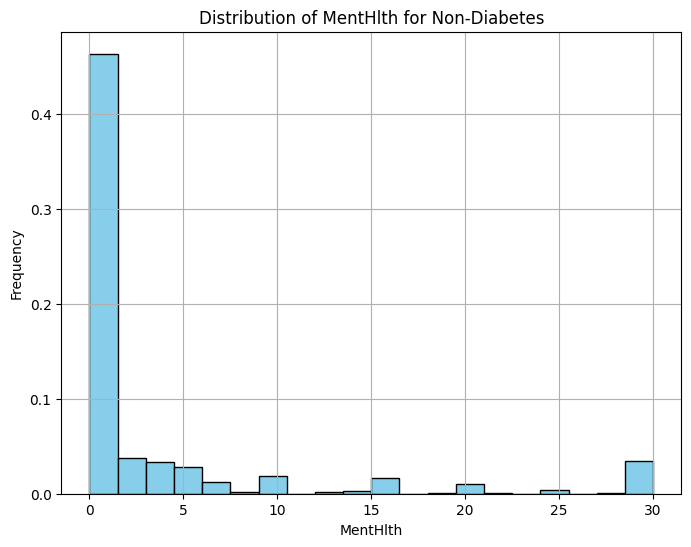

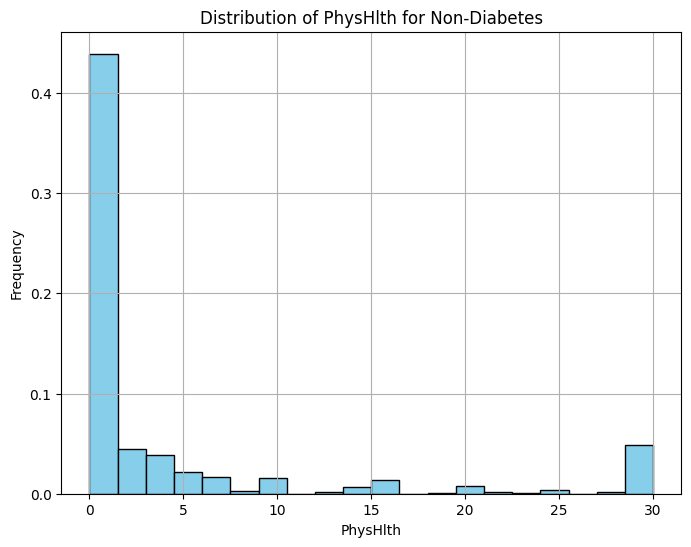

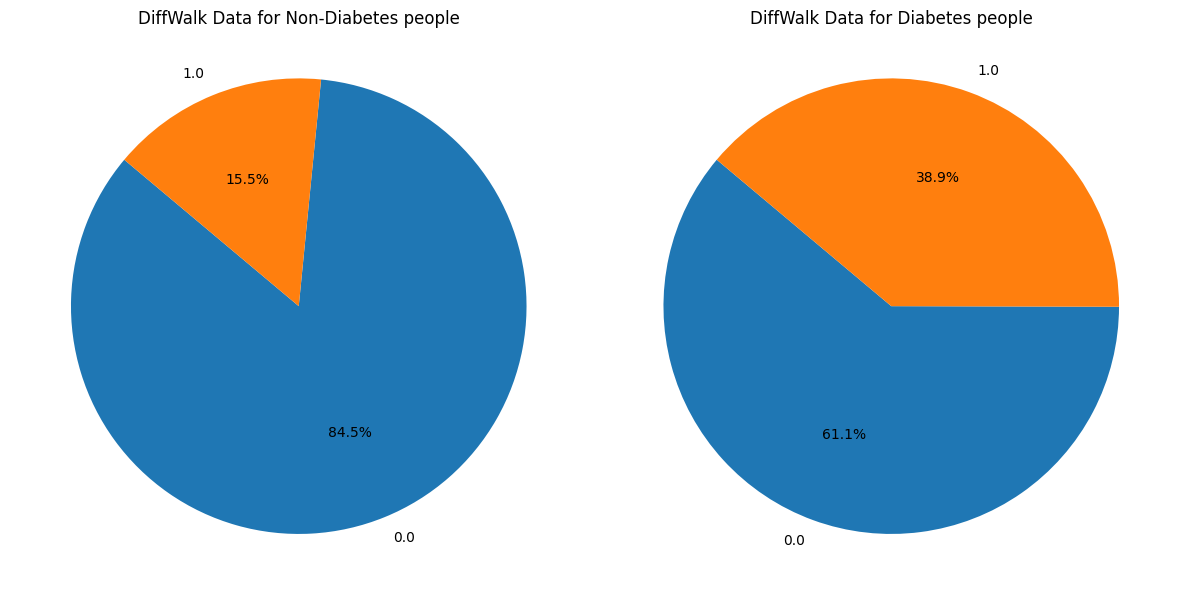

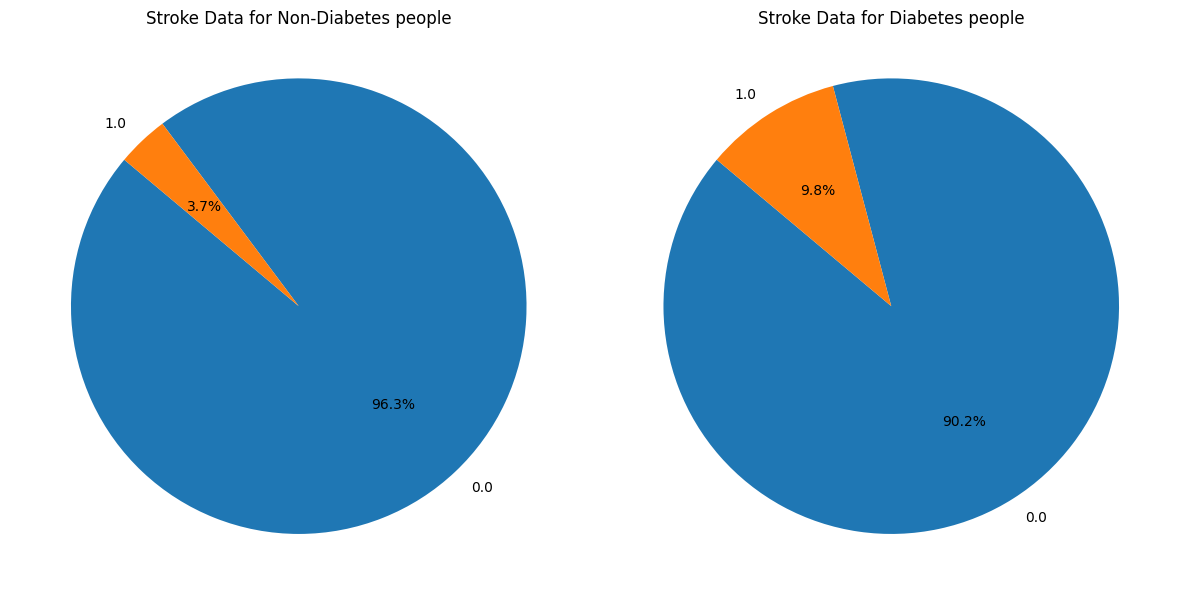

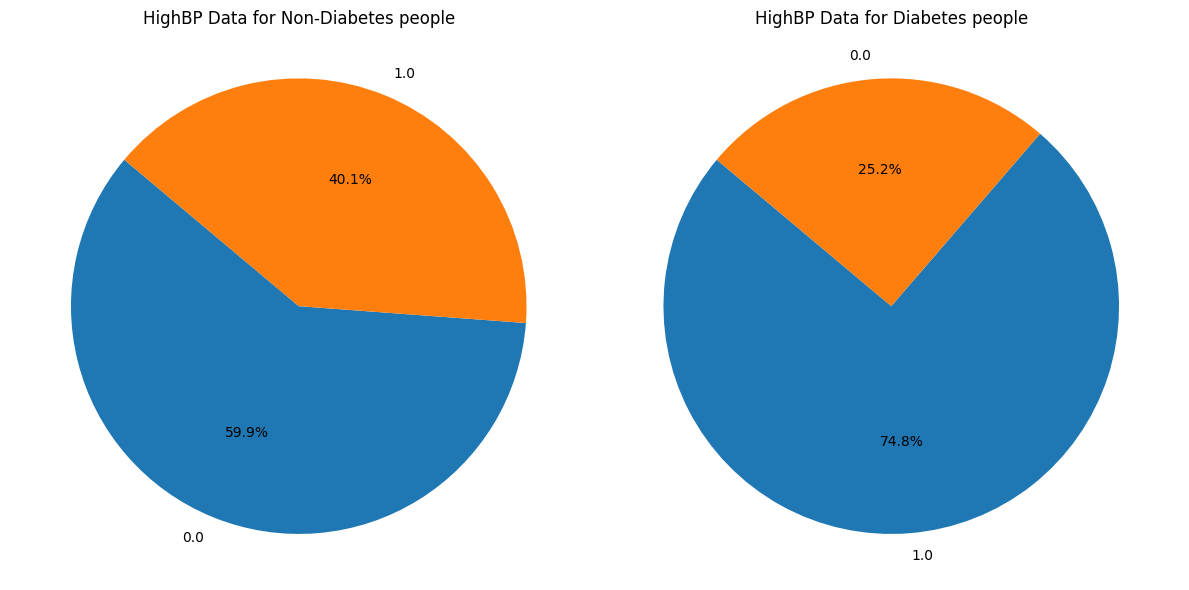

In [33]:
diabetes_0 = diabetes_data[diabetes_data['Diabetes'] == 0]
diabetes_0["Age"] *= 8
diabetes_1 = diabetes_data[diabetes_data['Diabetes'] == 1]
diabetes_1["Age"] *= 8

# Iterate through each attribute
for attribute in diabetes_data:
    if attribute == 'Diabetes':
        continue
    if diabetes_0[attribute].nunique() != 2:
        plt.figure(figsize=(8, 6))
        plt.hist(diabetes_0[attribute], density=True, bins=20, color='skyblue', edgecolor='black')
        plt.title(f"Distribution of {attribute} for Non-Diabetes")
        plt.xlabel(attribute)
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

        # Plot histogram for Non-Diabetes individuals
        # plt.figure(figsize=(8, 6))
        # plt.hist(diabetes_0[attribute], density=True, bins=20, color='skyblue', edgecolor='black', alpha=0.5, label='Non-Diabetes')
        # Plot histogram for Diabetes individuals
        # plt.hist(diabetes_1[attribute], density=True, bins=20, color='orange', edgecolor='black', alpha=0.5, label='Diabetes')
        # plt.title(f"Distribution of {attribute} for Diabetes and Non-Diabetes")
        # plt.xlabel(attribute)
        # plt.ylabel("Frequency")
        # plt.legend()
        # plt.grid(True)
        # plt.show()
    else:
        # Calculate value counts for the attribute in both Diabetes and Non-Diabetes datasets
        value_counts_0 = diabetes_0[attribute].value_counts()
        value_counts_1 = diabetes_1[attribute].value_counts()

        # Plot pie chart for Non-Diabetes individuals and Diabetes individuals side by side
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))

        # Non-Diabetes Pie Chart
        axs[0].pie(value_counts_0, labels=value_counts_0.index, autopct='%1.1f%%', startangle=140)
        axs[0].set_title(f"{attribute} Data for Non-Diabetes people")
        axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

        # Diabetes Pie Chart
        axs[1].pie(value_counts_1, labels=value_counts_1.index, autopct='%1.1f%%', startangle=140)
        axs[1].set_title(f"{attribute} Data for Diabetes people")
        axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

        plt.tight_layout()
        plt.show()

## Hypertension

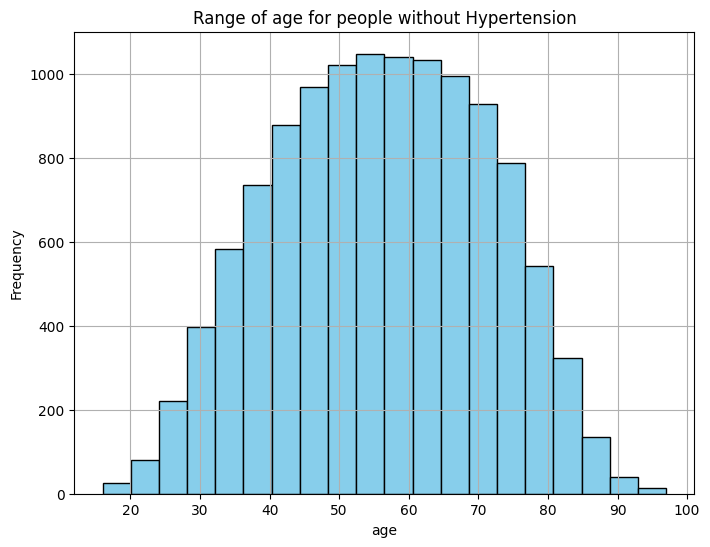

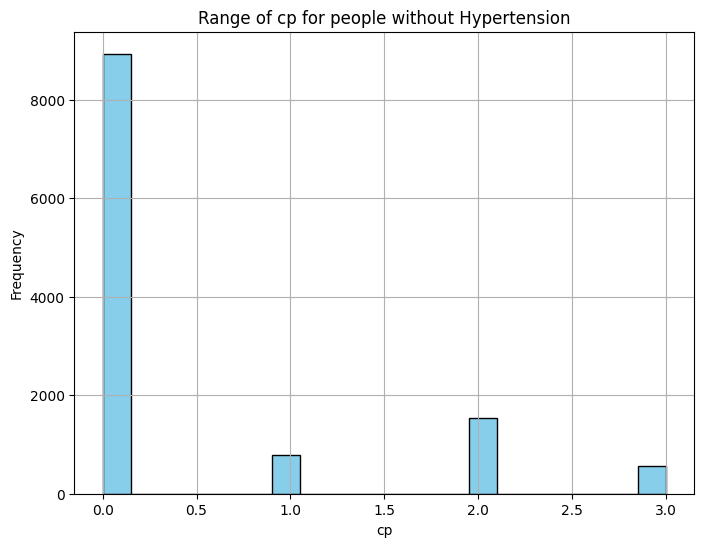

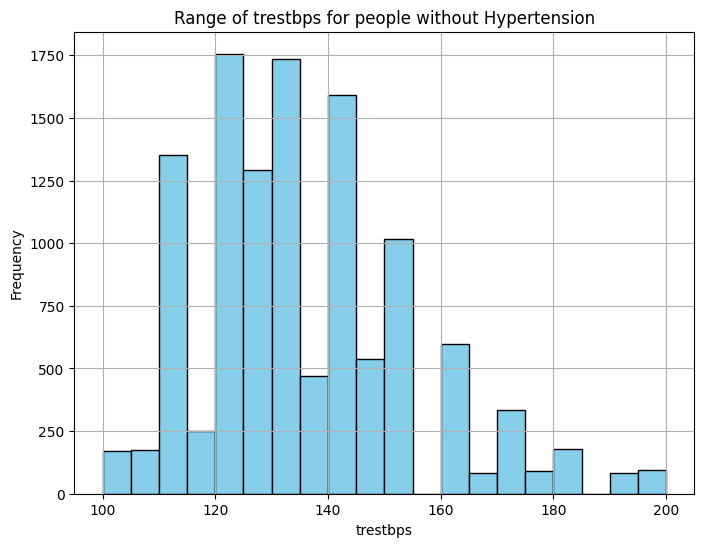

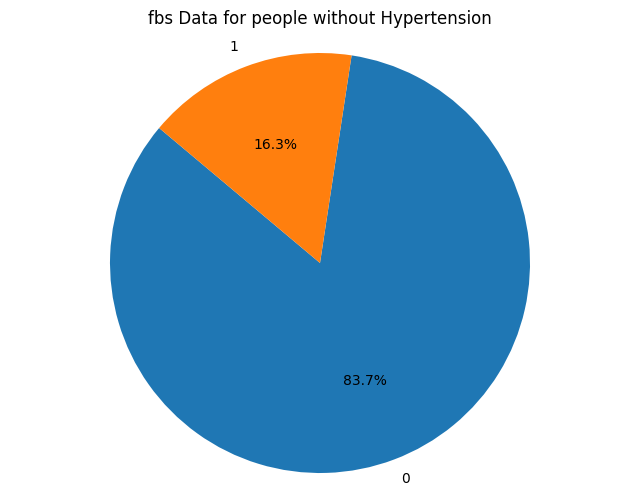

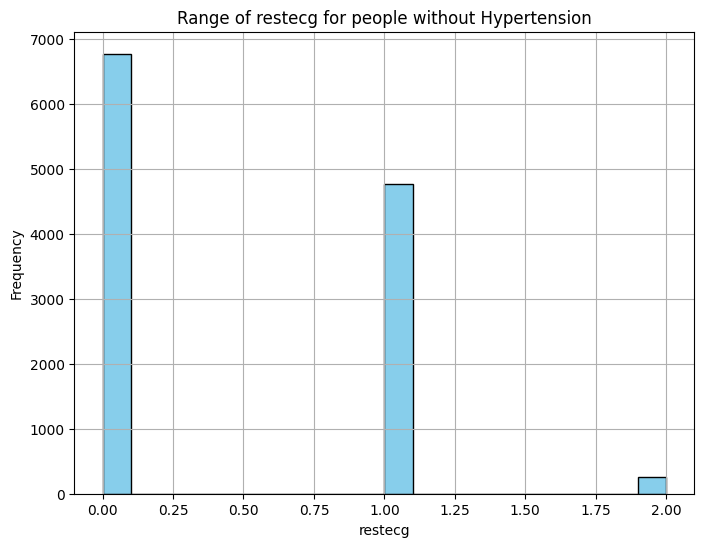

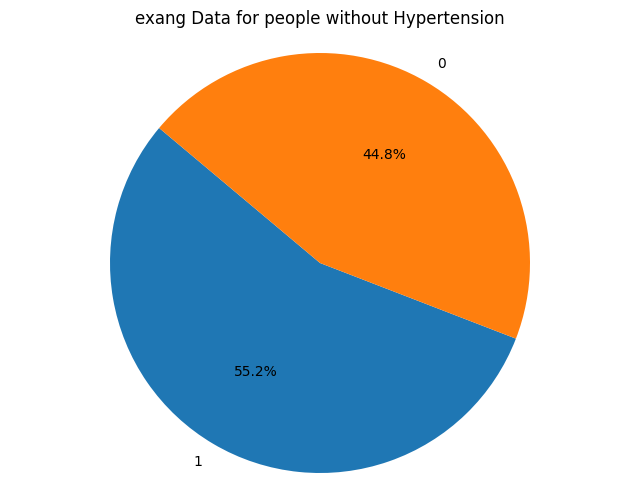

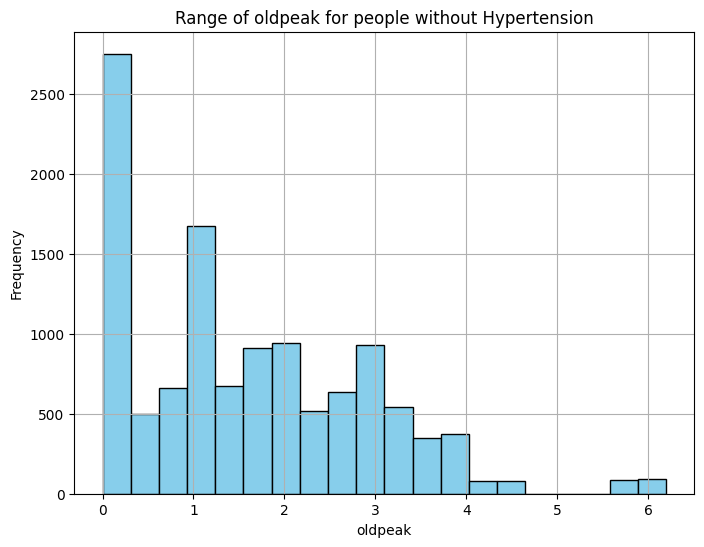

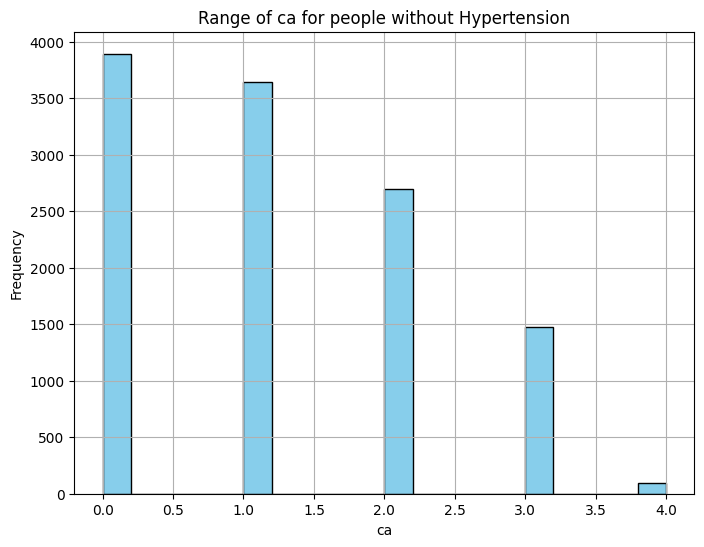

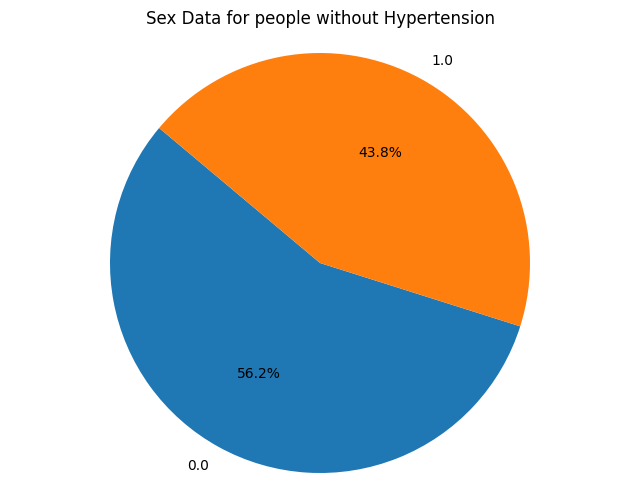

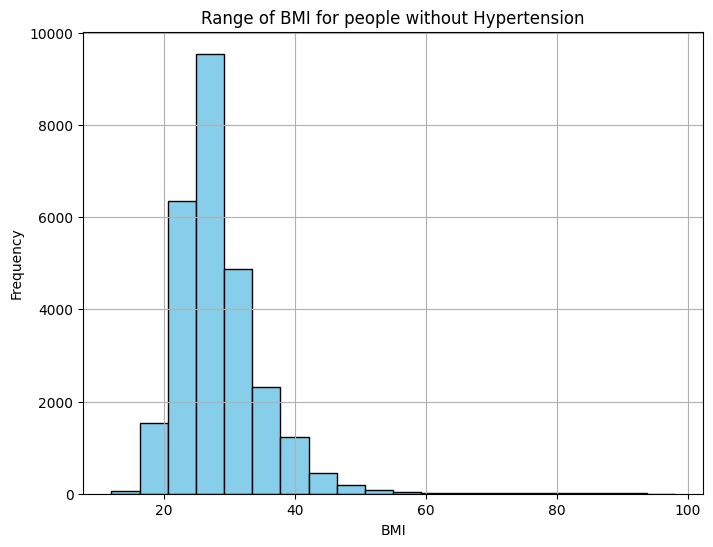

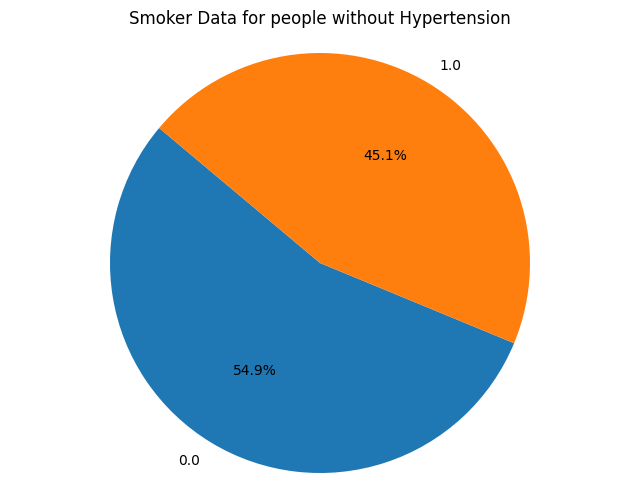

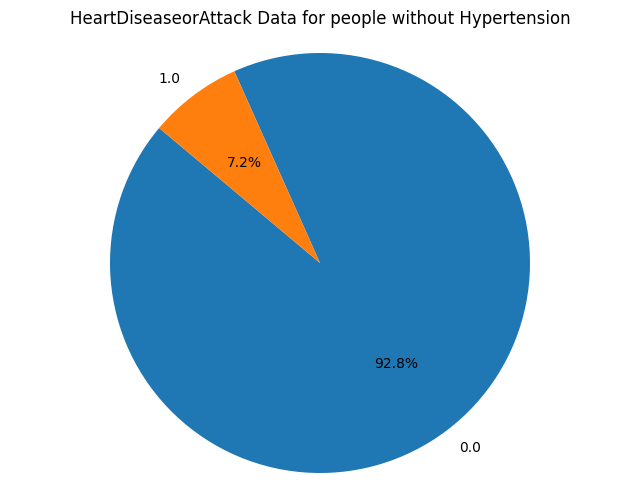

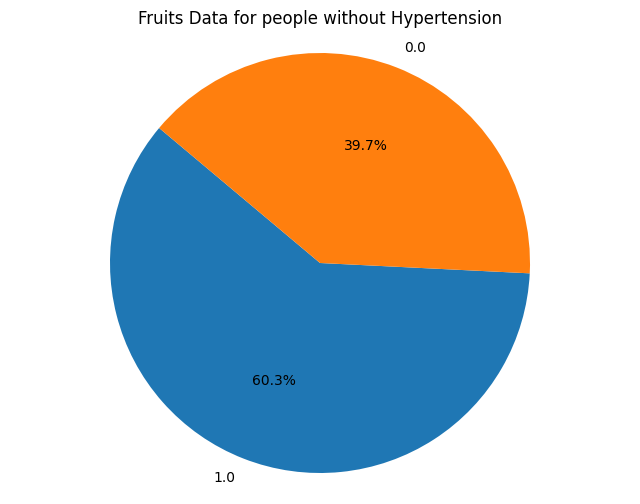

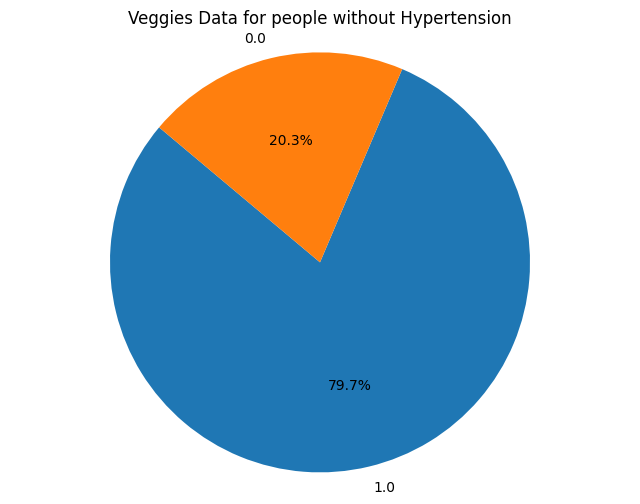

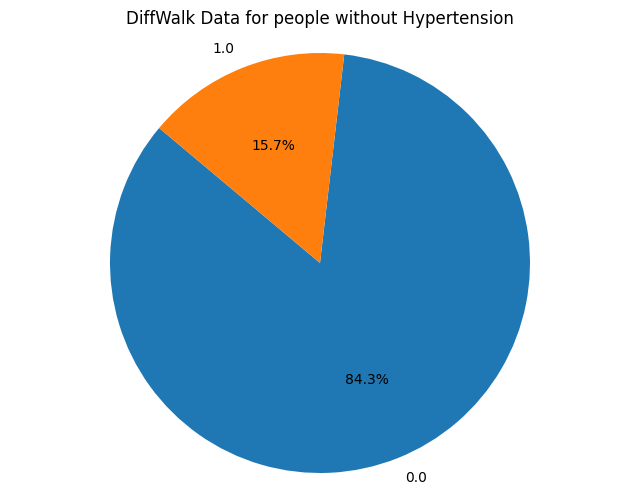

In [34]:
hypertension_data_0 = hypertension_data[hypertension_data['target'] == 0]

# Iterate through each attribute
for attribute in hypertension_data.columns[:-1]:
    if attribute == 'target': continue
    if hypertension_data_0[attribute].nunique() != 2:
        # Plot histogram
        plt.figure(figsize=(8, 6))
        plt.hist(hypertension_data_0[attribute], bins=20, color='skyblue', edgecolor='black')
        plt.title(f"Range of {attribute} for people without Hypertension")
        plt.xlabel(attribute)
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()
    else:
        # Calculate value counts for the attribute in the filtered dataset
        value_counts = hypertension_data_0[attribute].value_counts()

        # Plot a pie chart
        plt.figure(figsize=(8, 6))
        plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
        plt.title(f"{attribute} Data for people without Hypertension")
        plt.axis('equal')
        plt.show()


hypertension_data_diabetes_0 = diabetes_data[diabetes_data['HighBP'] == 0]

# Iterate through each attribute
for attribute in diabetes_data.columns[:]:
    if attribute == 'HighBP': continue
    if hypertension_data_diabetes_0[attribute].nunique() != 2:
        # Plot histogram
        plt.figure(figsize=(8, 6))
        plt.hist(hypertension_data_diabetes_0[attribute], bins=20, color='skyblue', edgecolor='black')
        plt.title(f"Range of {attribute} for people without Hypertension")
        plt.xlabel(attribute)
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()
    else:
      # Calculate value counts for the attribute in the filtered dataset
      value_counts = hypertension_data_diabetes_0[attribute].value_counts()

      # Plot a pie chart
      plt.figure(figsize=(8, 6))
      plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
      plt.title(f"{attribute} Data for people without Hypertension")
      plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
      plt.show()

## Stroke

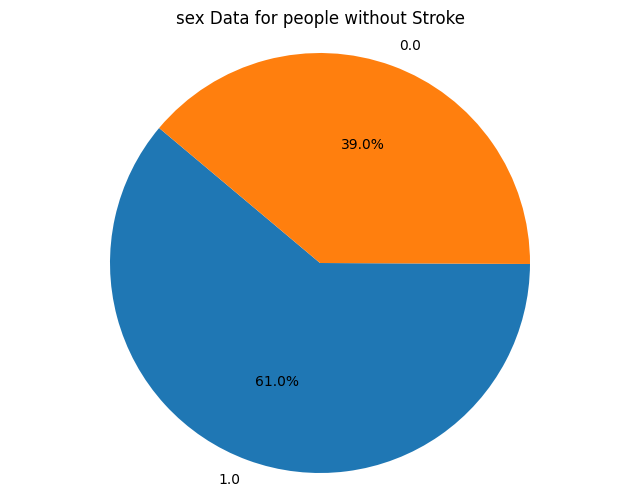

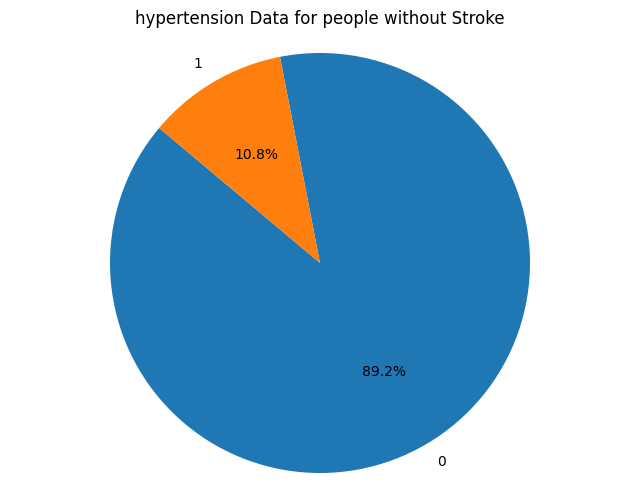

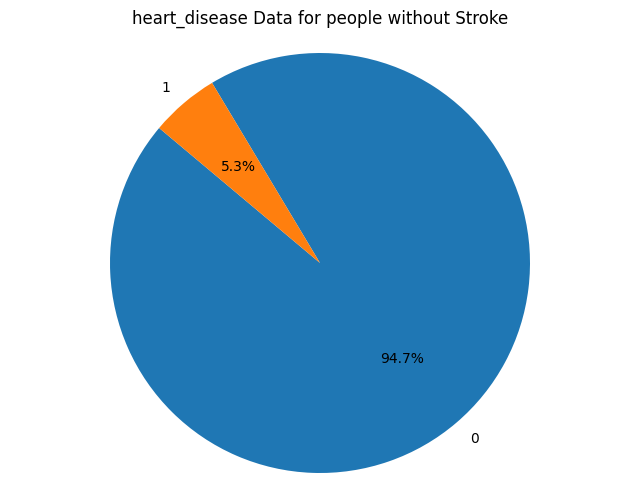

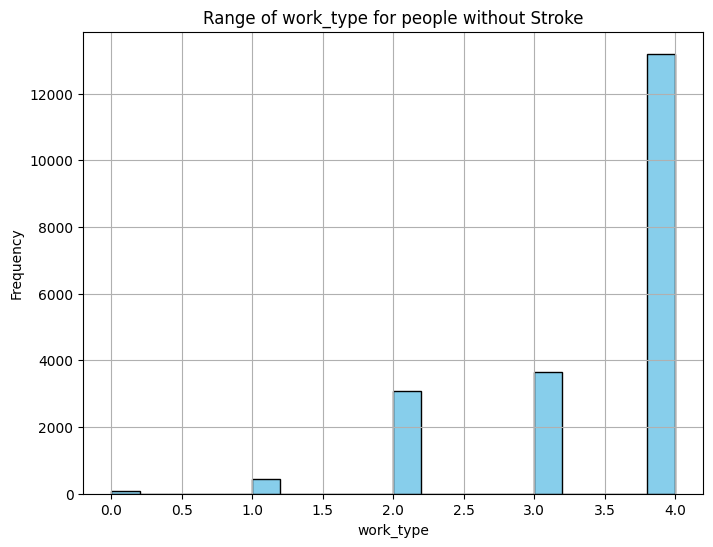

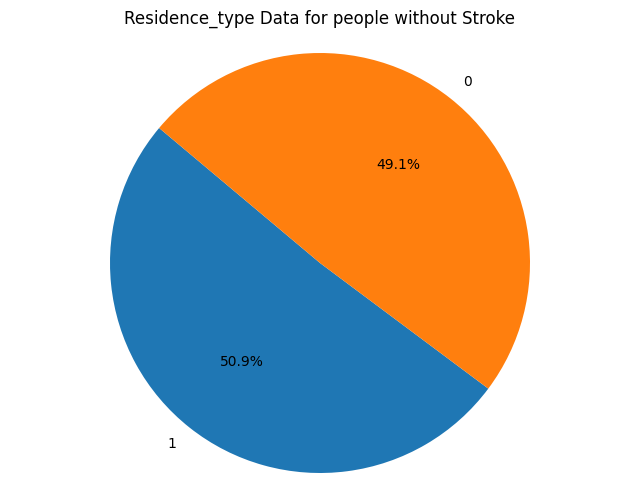

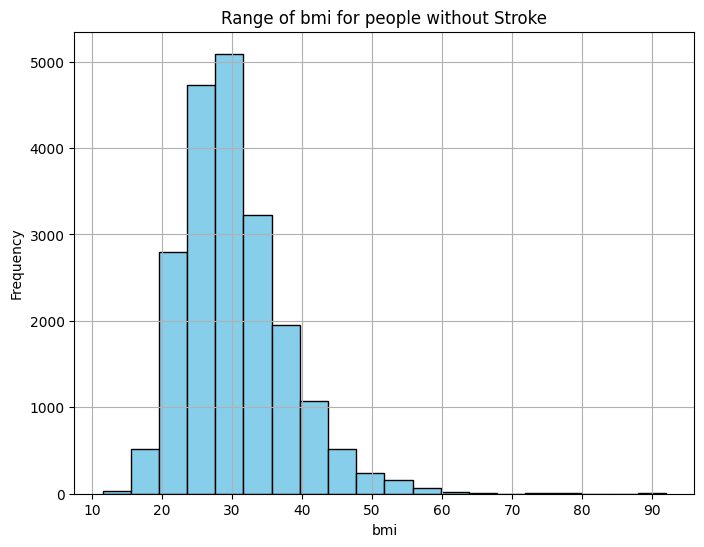

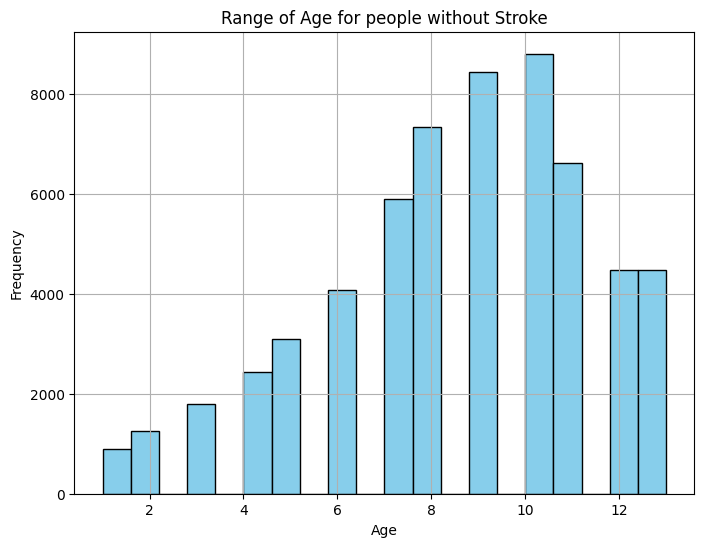

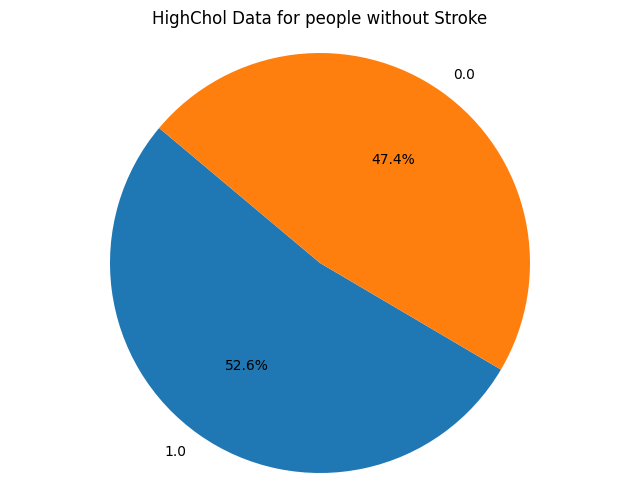

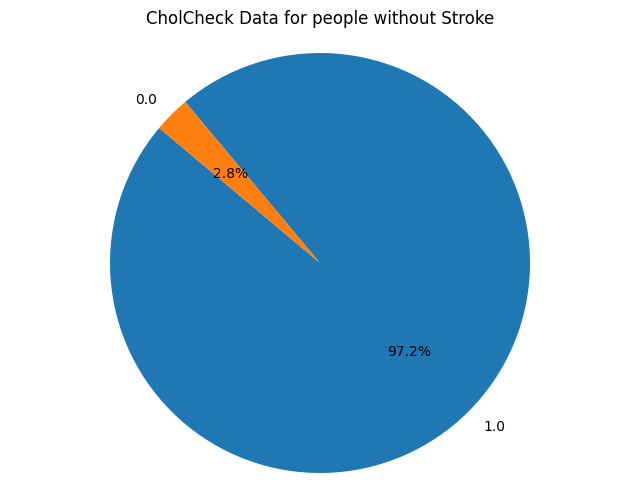

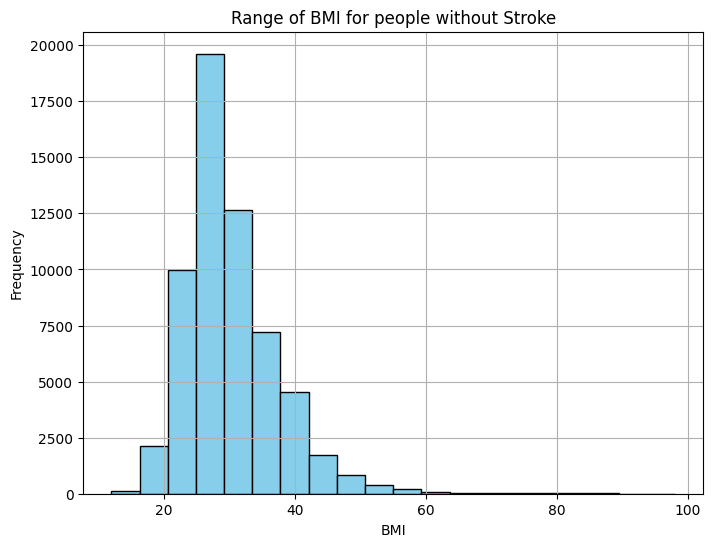

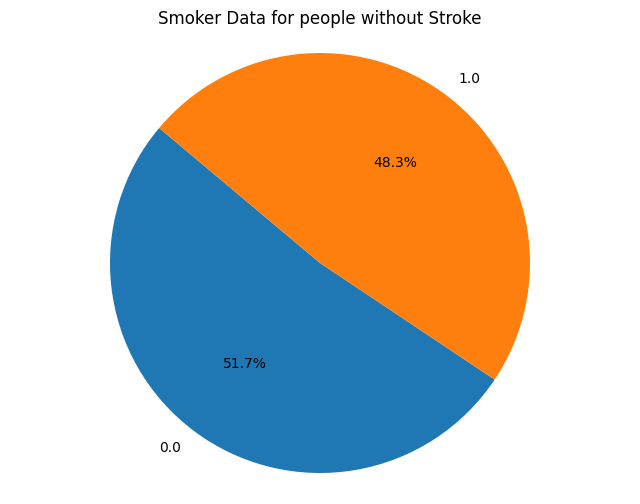

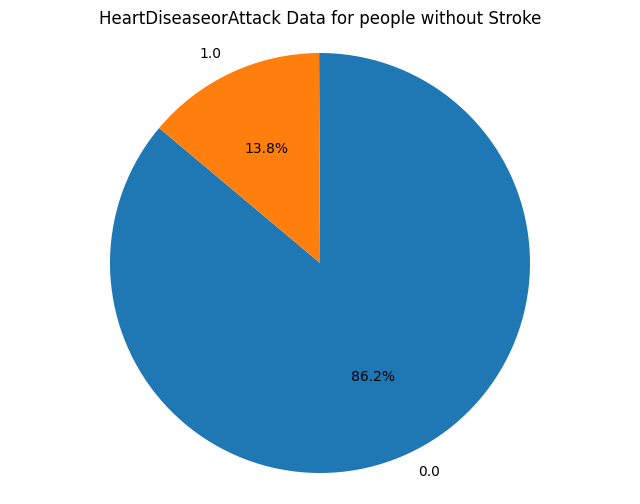

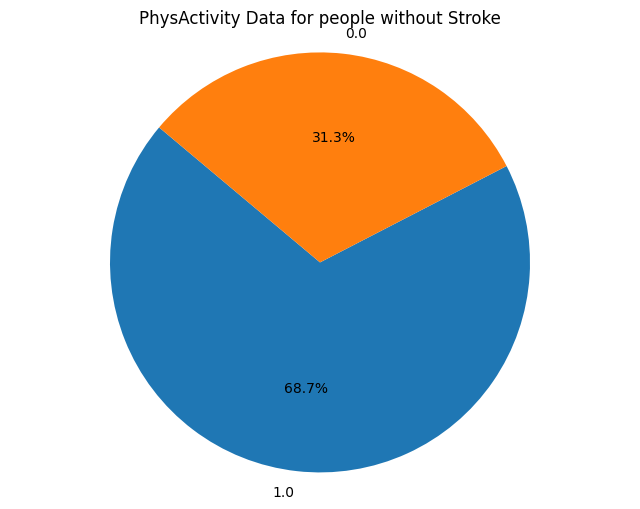

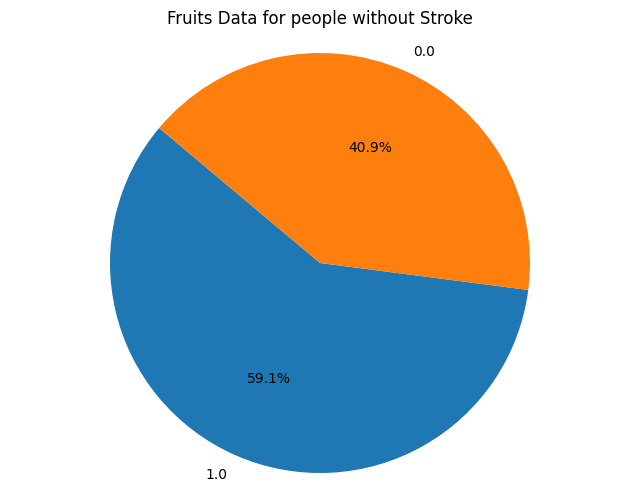

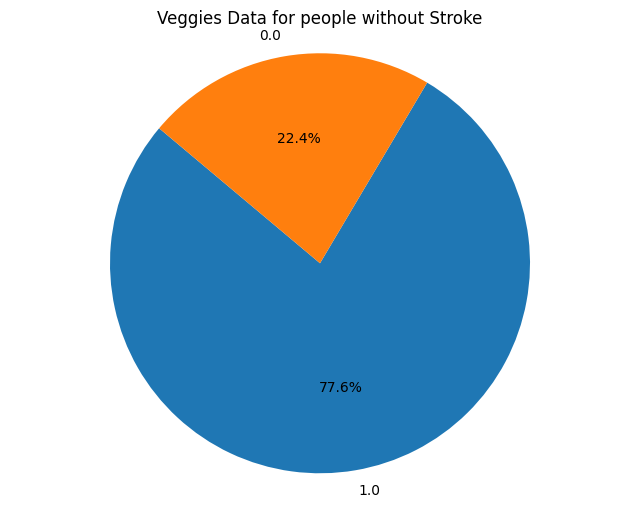

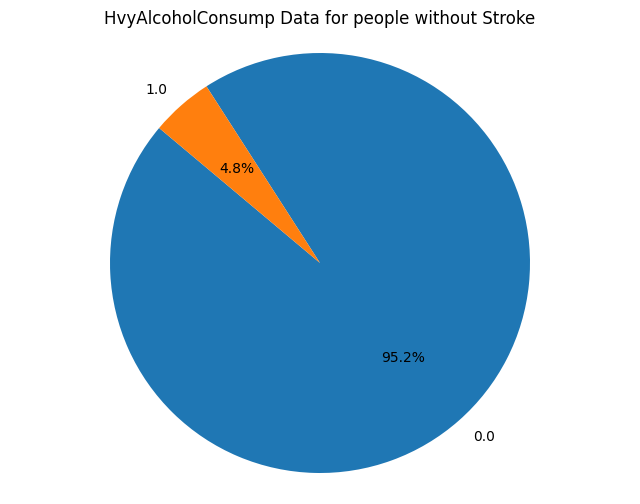

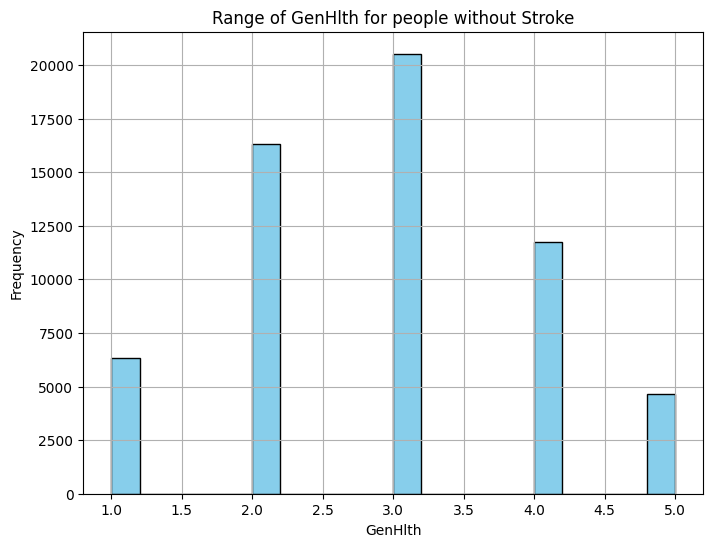

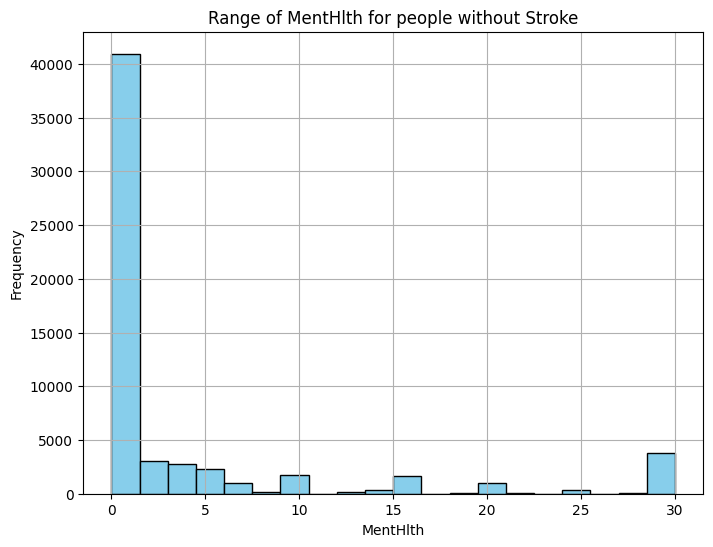

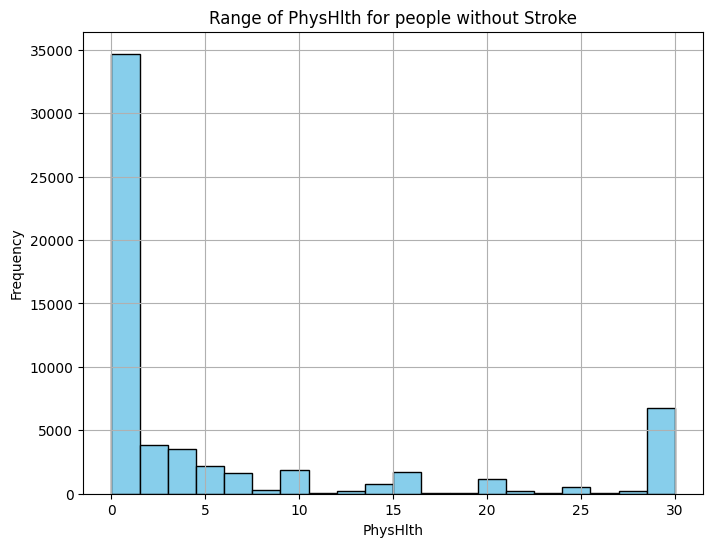

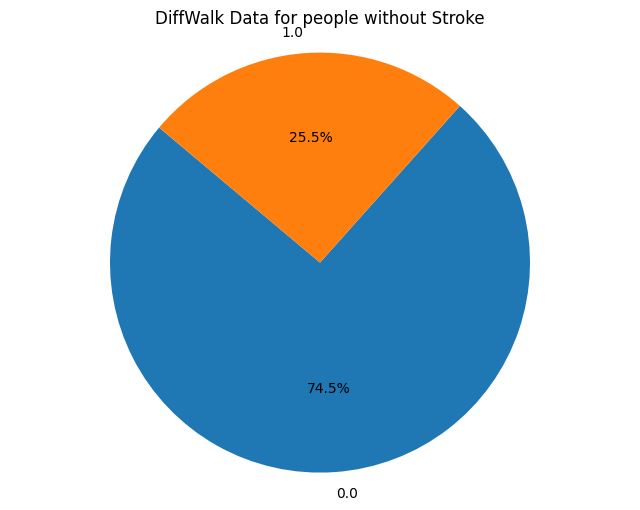

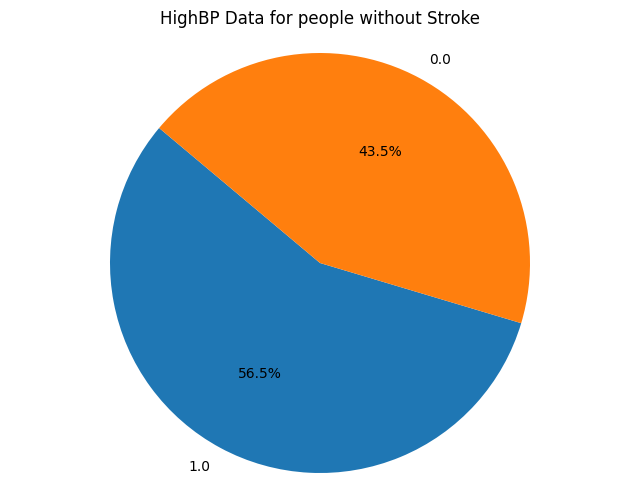

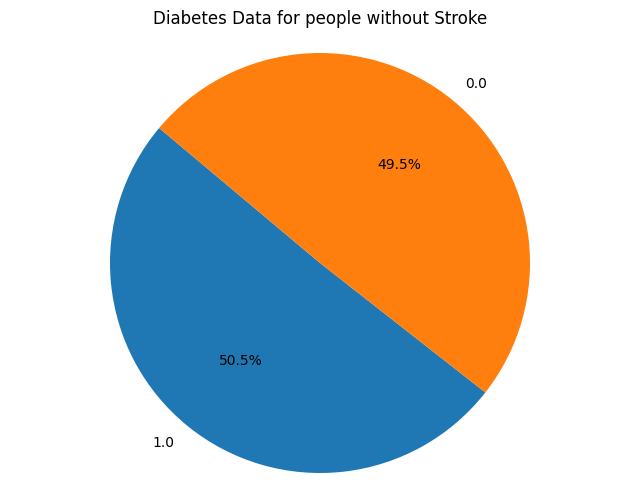

In [35]:
stroke_data_0 = stroke_data[stroke_data['stroke'] == 0]

# Iterate through each attribute
for attribute in stroke_data.columns[:-1]:
    if attribute == 'stroke': continue
    if stroke_data_0[attribute].nunique() != 2:
        # Plot histogram
        plt.figure(figsize=(8, 6))
        plt.hist(stroke_data_0[attribute], bins=20, color='skyblue', edgecolor='black')
        plt.title(f"Range of {attribute} for people without Stroke")
        plt.xlabel(attribute)
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()
    else:
        # Calculate value counts for the attribute in the filtered dataset
        value_counts = stroke_data_0[attribute].value_counts()

        # Plot a pie chart
        plt.figure(figsize=(8, 6))
        plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
        plt.title(f"{attribute} Data for people without Stroke")
        plt.axis('equal')
        plt.show()


stroke_data_diabetes_0 = diabetes_data[diabetes_data['Stroke'] == 0]

# Iterate through each attribute
for attribute in diabetes_data.columns[:]:
    if attribute == 'Stroke': continue
    if stroke_data_diabetes_0[attribute].nunique() != 2:
        # Plot histogram
        plt.figure(figsize=(8, 6))
        plt.hist(stroke_data_diabetes_0[attribute], bins=20, color='skyblue', edgecolor='black')
        plt.title(f"Range of {attribute} for people without Stroke")
        plt.xlabel(attribute)
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()
    else:
      # Calculate value counts for the attribute in the filtered dataset
      value_counts = stroke_data_diabetes_0[attribute].value_counts()

      # Plot a pie chart
      plt.figure(figsize=(8, 6))
      plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
      plt.title(f"{attribute} Data for people without Stroke")
      plt.axis('equal')
      plt.show()